# Wine review Analysis

##  Import libraries

In [1]:
import pandas as pd
import numpy as np
import statistics 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Polygon
import seaborn as sns
sns.set(style="ticks")
from scipy import stats

## Loading dataset

In [2]:
df = pd.read_csv('winemag-data_first150k.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# Data Wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [4]:
#Checking for duplicates
sum(df.duplicated())

0

In [5]:
#checking amount of null values
def null_val(dataset):
    columns = list(dataset)
    for col in columns: 
        if sum(dataset[col].isnull()) != 0:
            print(col, sum(dataset[col].isnull()))

null_val(df)

country 5
designation 45735
price 13695
province 5
region_1 25060
region_2 89977


In [6]:
#checking data type of all columns
def get_class(dataset):
    columns = list(dataset)
    for column in columns:
        dtype = type(dataset[column][0])
        print(column, dtype)
    
get_class(df)

#no changes needed

Unnamed: 0 <class 'numpy.int64'>
country <class 'str'>
description <class 'str'>
designation <class 'str'>
points <class 'numpy.int64'>
price <class 'numpy.float64'>
province <class 'str'>
region_1 <class 'str'>
region_2 <class 'str'>
variety <class 'str'>
winery <class 'str'>


In [7]:
#shape of dataset
print('the dataset has', df.shape[0], 'rows and', df.shape[1], 'columns')

the dataset has 150930 rows and 11 columns


In [8]:
#summary statistic about numeric variables in dataset
df.describe()

#Ratings all between 80 and 100. 
#Prices from 4 to 2300, while 75% of the prices are equal or 
#less to 40, huge variance in the dataset

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [9]:
#Check the country variables
df.country.value_counts()

#Most vines are from the famous wine regions of the world

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [10]:
#Check the variety variables (grape type)
df.variety.value_counts()

#There are many different grape types in the data set

Chardonnay                       14482
Pinot Noir                       14291
Cabernet Sauvignon               12800
Red Blend                        10062
Bordeaux-style Red Blend          7347
Sauvignon Blanc                   6320
Syrah                             5825
Riesling                          5524
Merlot                            5070
Zinfandel                         3799
Sangiovese                        3345
Malbec                            3208
White Blend                       2824
Rosé                              2817
Tempranillo                       2556
Nebbiolo                          2241
Portuguese Red                    2216
Sparkling Blend                   2004
Shiraz                            1970
Corvina, Rondinella, Molinara     1682
Rhône-style Red Blend             1505
Pinot Gris                        1365
Barbera                           1365
Cabernet Franc                    1363
Sangiovese Grosso                 1346
Pinot Grigio             

In [11]:
#Check out designation variable
df.designation.value_counts()

#Here it seems that little bit of research is needed
#Are there Spelling mistakes and titles need to be replaced?

Reserve                                    2752
Reserva                                    1810
Estate                                     1571
Barrel sample                              1326
Riserva                                     754
Barrel Sample                               639
Brut                                        624
Crianza                                     503
Estate Grown                                449
Estate Bottled                              396
Dry                                         374
Old Vine                                    331
Gran Reserva                                330
Brut Rosé                                   248
Extra Dry                                   244
Vieilles Vignes                             225
Bien Nacido Vineyard                        195
Rosé                                        180
Late Bottled Vintage                        171
Réserve                                     166
Late Harvest                            

In [12]:
#checkout province variable
df.province.value_counts()

California                                44508
Washington                                 9750
Tuscany                                    7281
Bordeaux                                   6111
Northern Spain                             4892
Mendoza Province                           4742
Oregon                                     4589
Burgundy                                   4308
Piedmont                                   4093
Veneto                                     3962
South Australia                            3004
Sicily & Sardinia                          2545
New York                                   2428
Northeastern Italy                         1982
Loire Valley                               1786
Alsace                                     1680
Marlborough                                1655
Southwest France                           1601
Central Italy                              1530
Southern Italy                             1439
Champagne                               

In [13]:
#checkout province variable
df.winery.value_counts()

Williams Selyem                374
Testarossa                     274
DFJ Vinhos                     258
Chateau Ste. Michelle          225
Columbia Crest                 217
Concha y Toro                  216
Kendall-Jackson                216
Trapiche                       205
Bouchard Père & Fils           203
Kenwood                        191
Joseph Drouhin                 189
De Loach                       189
Georges Duboeuf                188
Cameron Hughes                 172
Wines & Winemakers             169
Albert Bichot                  167
Robert Mondavi                 166
Louis Latour                   154
D'Arenberg                     153
Dry Creek Vineyard             153
Morgan                         153
Concannon                      151
Martin Ray                     149
Errazuriz                      148
Gary Farrell                   144
L'Ecole No. 41                 144
Olivier Leflaive               143
Iron Horse                     142
Waterbrook          

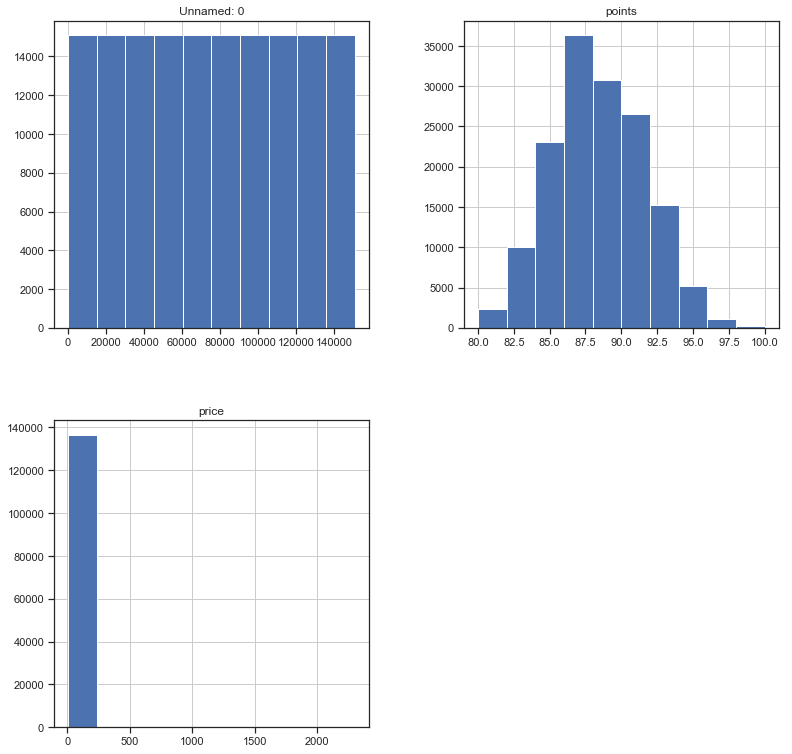

In [14]:
df.hist(figsize=(13,13));

# Assessing Data 

## Quality
- Unnamed: 0 column is not needed
- Designation coumn shows similar entries with different spelling
- Prices from 4 to 2'300, while 75% of the prices are equal or less to 40, huge variance in the dataset
- There are many countries, designations, wineries and provices, which only appear once
- There are 53'079 duplicates in the dataset 
- There are 13'695 rows with null values for price 
- There are 5 rows will null values for province and country
- There are 25'060 null values in region 1 and 89'977 null values in region 2

# Cleaning Data

In [15]:
#droping unwanted column 
df.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
# Designation: https://winefolly.com/tutorial/reserve-wine-well-depends/
#despite designation terms sound similar, the differences are not due to language, so they cannot be
#summarized
designation_style = {}
for key, value in zip(df.designation.value_counts().index, df.designation.value_counts()):
    designation_style[key]  = value

designation_names = []
for key, value in designation_style.items():
    designation_names.append(key)

designation_names = pd.DataFrame(designation_names)

designation_names.rename(columns = {0:'Name'}, inplace = True)
designation_names.sort_values(by=['Name'], inplace=True)

designation_names
#since designation variable provides too many confusing descriptions, it will be ignored

,Name
7013,"""M"""
23393,#50 Mon Chou
16633,#SocialSecret
24394,'72
20483,'A Naca Rosso
22474,'A Rina
25916,'Na Vota
26041,'Nearly Naked'
17100,'S'
6226,'l Clumbé


In [17]:
#dropping duplicaets
df.drop_duplicates(inplace=True)
df.shape

(97851, 10)

In [18]:
#checking again for null values after deleting duplicates
null_val(df)

country 3
designation 29896
price 8720
province 3
region_1 15932
region_2 58360


In [19]:
#check columns with 
df[df['country'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


In [20]:
#Fill out missing information with google

#http://www.tsililis.gr/english/page.aspx?id=1046&cat=3
df.loc[[1133],'country'] = 'Greece'
#http://www.buyulubag.com/eng/
df.loc[[1440],'country'] = 'Turkey'
#http://chilcaswines.com/home/
df.loc[[68226],'country'] = 'Chile'

#all others information can not be recovered 

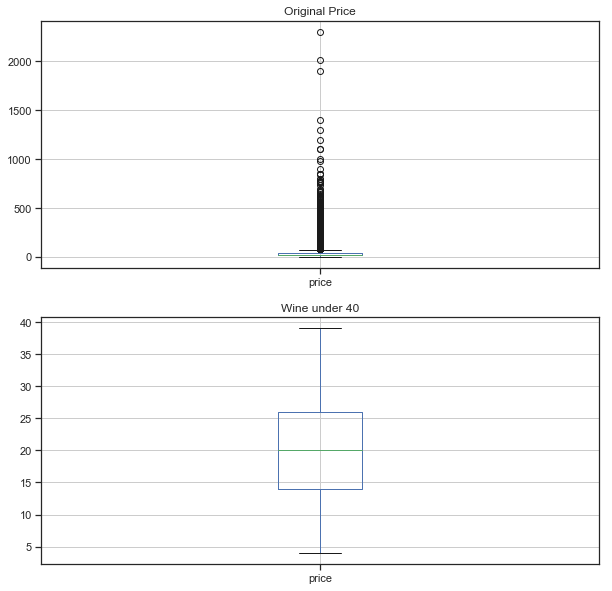

In [21]:
#checking distribution of price variable with boxplot
df_price_40 = df.query('price < 40')

#https://stackoverflow.com/questions/14770735/changing-figure-size-with-subplots/14770827
f, axs = plt.subplots(2,2,figsize=(10,10))

#creating 2 plots and plotting first with original df
plt.subplot(2, 1, 1)
df.boxplot(column='price');
plt.title('Original Price')

#2nd plot with wine under 40
plt.subplot(2, 1, 2)
df_price_40.boxplot(column='price');
plt.title('Wine under 40')

#adjust heightspace between the datasets
plt.subplots_adjust(hspace = 0.2)
plt.show()

#since most of the data (75%) show prices below or equal to 40
#a 2nd dataframe df_price_40 was created

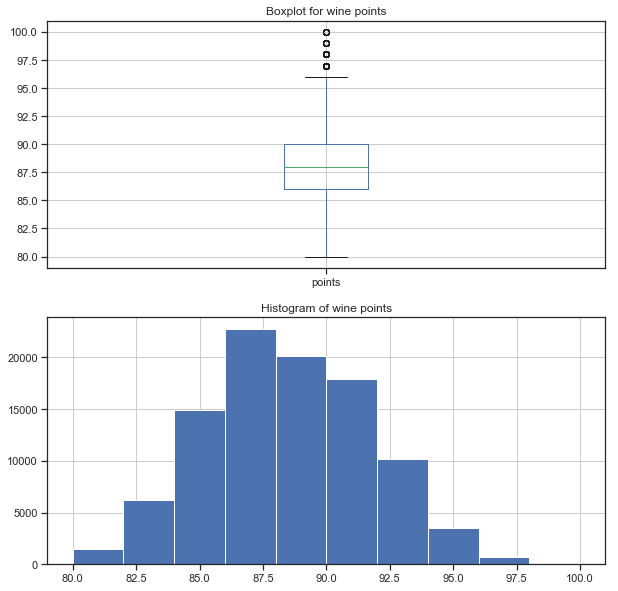

In [22]:
#https://stackoverflow.com/questions/14770735/changing-figure-size-with-subplots/14770827
f, axs = plt.subplots(2,2,figsize=(10,10))

#creating 2 plots and plotting first with original df
plt.subplot(2, 1, 1)
df.boxplot(column='points');
plt.title('Boxplot for wine points')

#2nd plot with wine under 40
plt.subplot(2, 1, 2)
df['points'].hist();
plt.title('Histogram of wine points')

#adjust heightspace between the datasets
plt.subplots_adjust(hspace = 0.2)
plt.show()



# Data Analysis

## Questions to answer:

- Which are the 5 most popular countries in the data set?
- Which are the 5 most popular designations in the data set?
- Which are the 5 most popular regions in the data set?
- Which are the 5 most popular varieties in the data set?
- Which are the 5 most pupular wineries in the data set?
- Which countries and regions produce the best wine in average?
- Which countries and regions produce has the highest median price for its wines?
- Which regions provide the best quality / price ratio in average?

##  Section
- Which are the 5 most popular countries in the data set?
- Which are the 5 most popular designations in the data set?
- Which are the 5 most popular regions in the data set?
- Which are the 5 most popular varieties in the data set?
- Which are the 5 most pupular wineries in the data set?


In [23]:
#creating get_top_5_value_counts that takes a dataframe and col as input
#It creates a dictionary "full_dic" with all the entries of a value_counts() function
#Then it creates a DataFrame based on the dictionary and renames it columns
#After the top 5 entries are only stored in a dataframe 
def get_top_5_value_counts(dataframe, col):
    full_dic = {}
    for index, value in zip(dataframe[col].value_counts().index, dataframe[col].value_counts()):
        full_dic[index] = value
    df_full_dic = pd.DataFrame.from_dict(full_dic, orient='index', columns=['count'])
    df_full_dic = df_full_dic.reset_index()
    df_full_dic = df_full_dic.rename(columns={'index' : col})
    df_full_dic_top5 = df_full_dic.iloc[:5,:]
    return df_full_dic_top5   

#same as previous function just providing a plot in the end
def get_top_5_value_counts_chart(dataframe, col):
    full_dic = {}
    for index, value in zip(dataframe[col].value_counts().index, dataframe[col].value_counts()):
        full_dic[index] = value
    df_full_dic = pd.DataFrame.from_dict(full_dic, orient='index', columns=['count'])
    df_full_dic = df_full_dic.reset_index()
    df_full_dic = df_full_dic.rename(columns={'index' : col})
    df_full_dic_top5 = df_full_dic.iloc[:5,:]
    chart = plt.bar(df_full_dic_top5[col], df_full_dic_top5['count'], color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xticks(rotation=65)
    plt.ylabel('Count')
    if col[-1] == 'y':
        col = col[:-1]+'ies'
    elif col[-2] == '_':
        col = col[:-2]+'s'
    else:
        col = col+'s'    
    plt.title('Top 5 most frequent ' + col.title() + ' within Dataset')
    return plt.show()

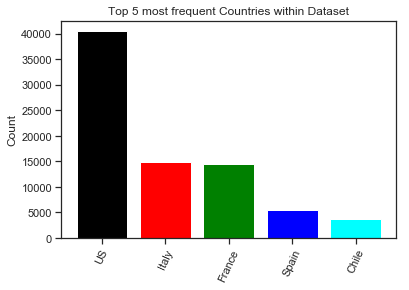

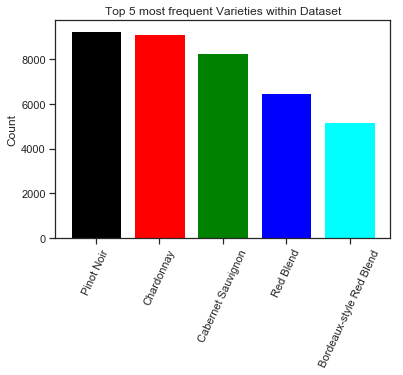

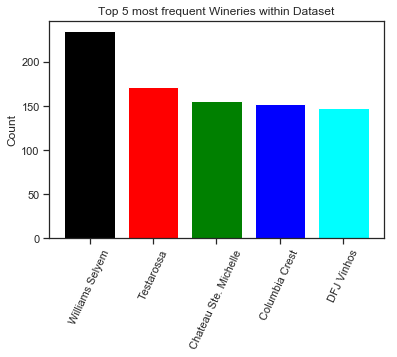

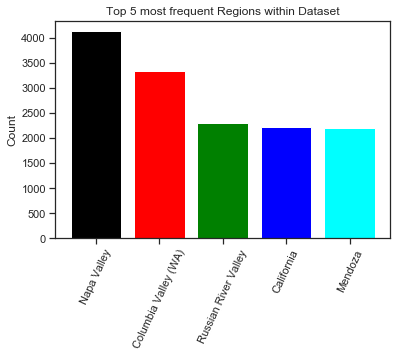

In [24]:
#Analysis of top 5 values among the string columns
fig1, ax1 = plt.subplots()
get_top_5_value_counts_chart(df, 'country');

fig2, ax2 = plt.subplots()
get_top_5_value_counts_chart(df, 'variety');

fig3, ax3 = plt.subplots()
get_top_5_value_counts_chart(df, 'winery');

fig4, ax4 = plt.subplots()
get_top_5_value_counts_chart(df, 'region_1');

plt.show()

In [25]:
popular_winaries = ['Williams Selyem', 'Testarossa', 'Chateau Ste. Michelle', 'Columbia Crest', 'DFJ Vinhos']

for winery in popular_winaries:
    a = df.query('winery == @winery')
    print(winery, ":", a.iloc[0,0])

print('-----------')    
popular_regions = ['Napa Valley', 'Columbia Valley (WA)', 'Russian River Valley', 'California', 'Mendoza']

for region in popular_regions:
    b = df.query('region_1 == @region')
    print(region, ":", b.iloc[0,0])


Williams Selyem : US
Testarossa : US
Chateau Ste. Michelle : US
Columbia Crest : US
DFJ Vinhos : Portugal
-----------
Napa Valley : US
Columbia Valley (WA) : US
Russian River Valley : US
California : US
Mendoza : Argentina


# Observations in first plot


The anlysis show that the most frequent wine samples by far, with more than 40'000 counts, are from the United States. Italy and France follow this values with almost 15'000 samples each. Spain and Chile are also among the top 5 represented countries in the data set. 

The 2nd bar chart indicates the most popular varieties in the data set are Pinot Noir, Chardonnay, Cabarnet Sauvignon, Red Blend and Bordeaux-style Red Blend, while Pinot Noir, Chardonnay and Cabarnet Sauvignon share almost the same popularity. 

The most frequent appearing wineries are Williams-Selyem, Testarossa, Chateau Ste. Michelle, Columbia Crest and DFJ Vinhos. Interestingly Williams-Selyem, Testarossa, Chateau Ste. Michelle and Columbia Crest are located in the United Sates, despite having french origin names. Only DFJ Vinhos among the top 5 most frequent wineries is located in Portgual. 

The most frequent appearing regions are Napa Valley, Columbia Valley (WA), Russian River Valley, California,  and Mendoza. The first 4 are all located in the United States, while only Mendoza is located outstide the U.S., namely in Argentina. Napa Valley provides more than 4000 wines, while Columbia Valley (WA) a bit more than 3000 wines. All other regions provide less than 2500 wines. 


**The findings indicate for a need to create a data set without the United States**

In [26]:
#Create a DataFrame without the US
df_not_us = df.query('country !="US"')

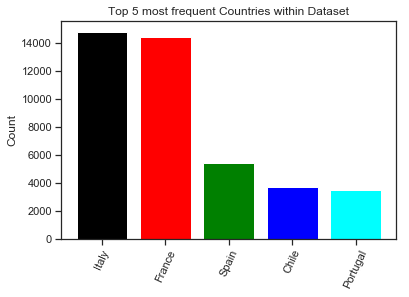

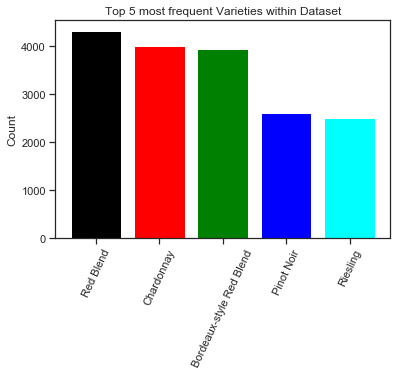

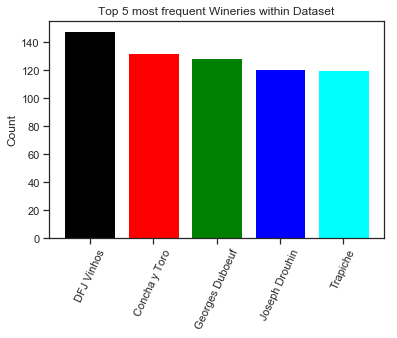

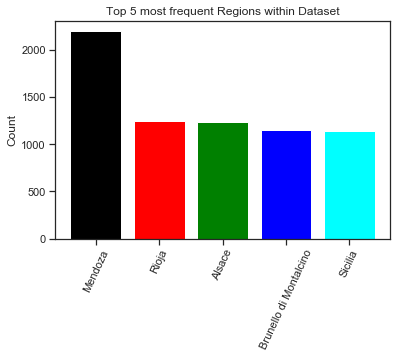

In [27]:
#Analysis of top 5 values among the string columns
fig1, ax1 = plt.subplots()
get_top_5_value_counts_chart(df_not_us, 'country');

fig2, ax2 = plt.subplots()
get_top_5_value_counts_chart(df_not_us, 'variety');

fig3, ax3 = plt.subplots()
get_top_5_value_counts_chart(df_not_us, 'winery');

fig4, ax4 = plt.subplots()
get_top_5_value_counts_chart(df_not_us, 'region_1');

plt.show()

In [28]:
popular_winaries_notus = ['DFJ Vinhos', 'Concha y Toro', 'Georges Duboeuf', 'Joseph Drouhin', 'Trapiche' ]

for winery in popular_winaries_notus:
    a = df.query('winery == @winery')
    print(winery, ":", a.iloc[0,0])

print('-----------')    
popular_regions_notus = ['Mendoza', 'Rioja', 'Alsace', 'Brunello di Montalcino', 'Sicilia']

for region in popular_regions_notus:
    b = df.query('region_1 == @region')
    print(region, ":", b.iloc[0,0])



DFJ Vinhos : Portugal
Concha y Toro : Chile
Georges Duboeuf : France
Joseph Drouhin : France
Trapiche : Argentina
-----------
Mendoza : Argentina
Rioja : Spain
Alsace : France
Brunello di Montalcino : Italy
Sicilia : Italy


# Observation of same plots without the us


By excluding the US from the anlysis, the data show that the most frequent wine sample are from the same 4 as priviously, except Portugal was added to the list of top 5 countries outside the us. Portugal provides almost different 4'000 wines. The dataset shwos that outside the United States, Europe is a major hub for producing wine. 

The 2nd bar chart indicates the most popular varieties in the data set are Red Blend, Chardonnay, Bordeaux-style Red Blend, Pinot Noir and Riesling. The chart indicates that different varietes are among the most popular ones by excluding the United Stats. While Red Blen, Chardonnay, Bordeaux-style and Pinot Noir remained in the list, Cabarnet Sauvignon dropped out of the list. Even more surprising, Chardonnay was not the most popular variety among the remaining ones, and also otherwise the order of popularity changed. New to the list Riesling was added with more than 2000 samples.

The most frequent appearing wineries outside the U.S. are DFJ Vinhos (Portugal), Concha y Toro (Chile), Georges Duboeuf (France), Joseph Drouhin (France) and Trapiche (Argentina). All of the wineries contributed 120-140 different wines to the data set. 

Interestingly the regions don't follow the same trend as the top wineries. The top region in the dataset, outside the United States, was Mendoza (Argentina), followed by Rioja (Spain), Alsace (France), Brunello di Montalcino (Italy) and Sicilia (Italy). Thereby, Mendoza was by far the most popular region with more than 2000 samples from the region, followed by Roja with approx. 1200 samples. 


##  Section

- Which countries and regions produce the best wine in average?
- Which countries and regions produce has the highest median price for its wines?
- Which regions provide the best quality / price ratio in average?

In [29]:
#creates a function that creates a subset of the data frame, depending on value counts of a column
#inputs: dataframe, desired column and the minimum amount of values needed to be added to dataframe
#outputs: new dataframe based on column and minimum value counts
def create_df_value_counts(dataframe, col, amount_of_min_value_counts):
    dic = {}
    for index, value in zip(dataframe[col].value_counts().index, dataframe[col].value_counts()):
        dic[index] = value
    dic_amount = []
    for key, value in dic.items():
        if value >= amount_of_min_value_counts:
            dic_amount.append(key)
    new_df = df[df[col].isin(dic_amount)]
    return new_df

In [30]:
#create df with countries with more than 100 wines 
df_country_100 = create_df_value_counts(df,'country',100)

#create df with wineries with more than 10 wines 
df_winery_10 = create_df_value_counts(df,'winery',10)

In [31]:
#- Which countries produce the best wine in average?
#creates a function that creates a groupedby calculation of a column and applies a statistic
#to a selected value (row), sorting these values and slicing the dataframe, then it returns a chart
#inputs: dataframe, desired column to groupby, desired value to apply calculation, 
#sort ascending or not (True or False), slice by the amount of datapoints desired and apply a 
#statistics to the columns
#outputs: bar chart based on the applied statistcs
def get_best_wine_grouped_chart (dataframe, groupedby, value, sort, amount, stat):
    #calculating statistics based on groupby
    if stat == 'mean':
        grouped = dataframe.groupby(groupedby)[value].mean().reset_index()
        grouped = grouped.sort_values(value, ascending=sort)
        grouped_amount = grouped.iloc[:amount,:]
    elif stat == 'median':
        grouped = dataframe.groupby(groupedby)[value].median().reset_index()
        grouped = grouped.sort_values(value, ascending=sort)
        grouped_amount = grouped.iloc[:amount,:]
    elif stat == 'sum':
        grouped = dataframe.groupby(groupedby)[value].sum().reset_index()
        grouped = grouped.sort_values(value, ascending=sort)
        grouped_amount = grouped.iloc[:amount,:]
        
    #adding country behind a region
    if groupedby == 'region_1':
        popular_regions = list(grouped_amount[groupedby])
        region_countries = []
        for region in popular_regions:
            region_countries.append(dataframe[dataframe[groupedby] == region].iloc[0,0])
        for i in range(len(grouped_amount[groupedby])):
            grouped_amount.iloc[i, 0] = grouped_amount.iloc[i, 0] + ' ' +'(' + region_countries[i] +')'

    #adding country behind a winery
    if groupedby == 'winery':
        popular_winery = list(grouped_amount[groupedby])
        winery_countries = []
        for winery in popular_winery:
            winery_countries.append(dataframe[dataframe[groupedby] == winery].iloc[0,0])
        for i in range(len(grouped_amount[groupedby])):
            grouped_amount.iloc[i, 0] = grouped_amount.iloc[i, 0] + ' ' +'(' + winery_countries[i] +')'

            
    
    #plotting the chart        
    chart = plt.bar(grouped_amount[groupedby], grouped_amount[value], color='black')
    plt.xticks(rotation=65)
    plt.ylabel(value)
    return chart;


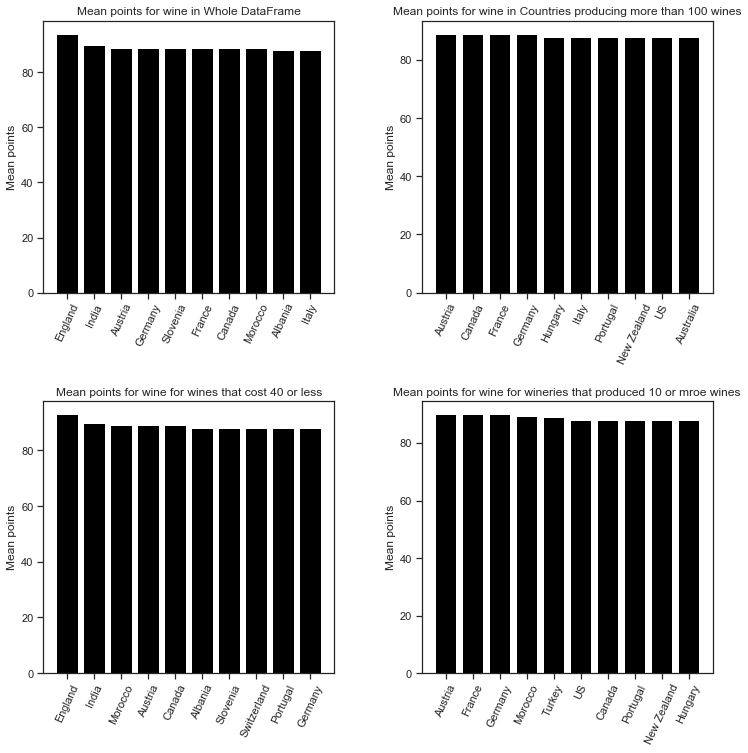

In [32]:
#https://matplotlib.org/tutorials/introductory/pyplot.html
    
plt.figure(1, figsize=(12,12))

plt.subplot(221)
get_best_wine_grouped_chart(df,'country','points', False, 10, 'median');
plt.ylabel('Mean points')
plt.title('Mean points for wine in Whole DataFrame')
plt.subplot(222)
get_best_wine_grouped_chart(df_country_100,'country','points', False, 10, 'median');
plt.ylabel('Mean points')
plt.title('Mean points for wine in Countries producing more than 100 wines')
plt.subplot(223)
get_best_wine_grouped_chart(df_price_40,'country','points', False, 10, 'median');
plt.ylabel('Mean points')
plt.title('Mean points for wine for wines that cost 40 or less')
plt.subplot(224)
get_best_wine_grouped_chart(df_winery_10,'country','points', False, 10, 'median');
plt.ylabel('Mean points')
plt.title('Mean points for wine for wineries that produced 10 or mroe wines')

plt.subplots_adjust(hspace = 0.4, wspace=0.3)
plt.show();

In [33]:
len(df.query('country == "England"'))

9

# Observation of Wine Quality Plots


The data set indicated again very interesting insights. On the one hand side it revealed that the best wines (according to points) are different by subsetting the data. Surprisingly, the full data set indicates that England shows up as country with the highest wine quality.. A country that is rather know for football, fish and chips or else, not necessarily for good wine. By subsetting, different top 10 consetllations. One has to consider that it only contributed with 9 samples to the dataset. 

By analyzing only countries with larger amount of wine samples (100 wines in countries or 10 produced wines by wineries), Austria France and Germany are among the countries with the best wine quality. 

By focusing only on cheaper wine (price under 40, what refers to 75% of the data set), the analysis show that England, India and Marocco are the most popular countries. 

Overall the differences in wine quality tend to be rather small among the analyzed countries. 


**Next**

- Which produce the best wine in average?


/Users/Nunu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


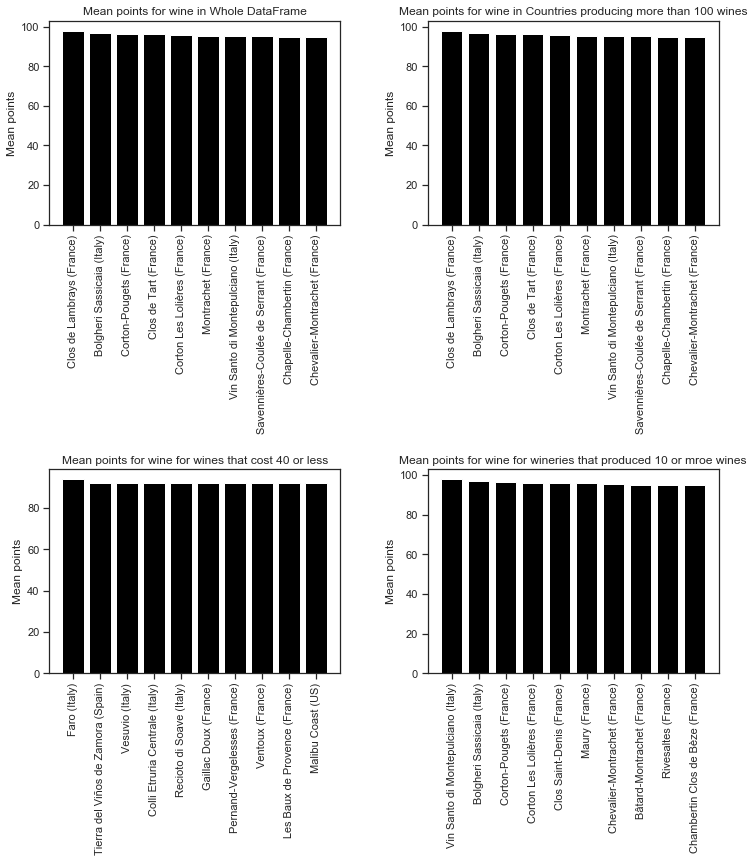

In [34]:
#https://matplotlib.org/tutorials/introductory/pyplot.html
    
plt.figure(1, figsize=(12,12))

plt.subplot(221)
get_best_wine_grouped_chart(df,'region_1','points', False, 10, 'median');
plt.ylabel('Mean points')
plt.title('Mean points for wine in Whole DataFrame')
plt.xticks(rotation=90)

plt.subplot(222)
get_best_wine_grouped_chart(df_country_100,'region_1','points', False, 10, 'median');
plt.ylabel('Mean points')
plt.title('Mean points for wine in Countries producing more than 100 wines')
plt.xticks(rotation=90)

plt.subplot(223)
get_best_wine_grouped_chart(df_price_40,'region_1','points', False, 10, 'median');
plt.ylabel('Mean points')
plt.title('Mean points for wine for wines that cost 40 or less')
plt.xticks(rotation=90)

plt.subplot(224)
get_best_wine_grouped_chart(df_winery_10,'region_1','points', False, 10, 'median');
plt.ylabel('Mean points')
plt.title('Mean points for wine for wineries that produced 10 or mroe wines')
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 1.2, wspace=0.3)
plt.show();

# Observation of Wine Quality Plots by Region

Our picture seem to remain constant with different result in different subsets of the data. But what remained contant in the qine quality anlysis by region was the predominant role of wine regions in France and Italy among all subsets. Clos de Lambrays, Bolgheri Sassicaia Clos de Tart and Corton les Loileres seem to be very good wine regions. For lower cost wine (below 40), Faro in Italy, Tierra del Viños de Zoamora in Spain, Vesuvio in Italy, etc. were among the best wine regions.

Similar in all data set was the little difference in quality scores within the subsets. But it seems to show that lower cost wine achieve lower quality scores. 



**Next**

- Which countries produce has the highest median price for its wines?

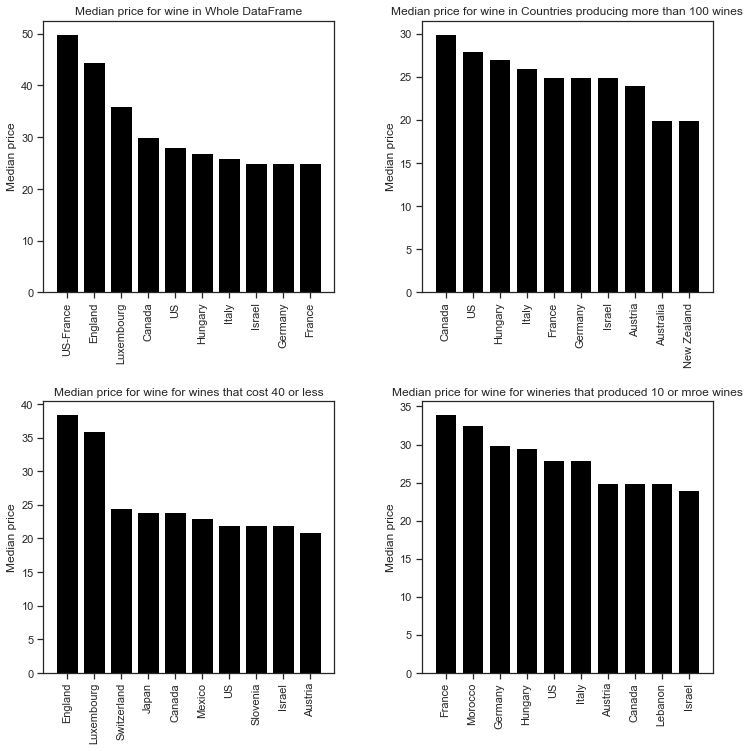

In [35]:
#https://matplotlib.org/tutorials/introductory/pyplot.html
    
plt.figure(1, figsize=(12,12))

plt.subplot(221)
get_best_wine_grouped_chart(df,'country','price', False, 10, 'median');
plt.ylabel('Median price')
plt.title('Median price for wine in Whole DataFrame')
plt.xticks(rotation=90)

plt.subplot(222)
get_best_wine_grouped_chart(df_country_100,'country','price', False, 10, 'median');
plt.ylabel('Median price')
plt.title('Median price for wine in Countries producing more than 100 wines')
plt.xticks(rotation=90)

plt.subplot(223)
get_best_wine_grouped_chart(df_price_40,'country','price', False, 10, 'median');
plt.ylabel('Median price')
plt.title('Median price for wine for wines that cost 40 or less')
plt.xticks(rotation=90)

plt.subplot(224)
get_best_wine_grouped_chart(df_winery_10,'country','price', False, 10, 'median');
plt.ylabel('Median price')
plt.title('Median price for wine for wineries that produced 10 or mroe wines')
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 0.4, wspace=0.3)
plt.show();

In [36]:
len(df.query('country == "US-France"')), len(df.query('country == "England"')),
len(df.query('country == "Luxembourg"')),len(df.query('country == "Switzerland"')),
len(df.query('country == "Morocco"')),len(df.query('country == "Hungary"')),

(11, 139)

# Median wine Cost in Countries

The first plot indicate that US-France co-produced wine achieve the highest median price. One needs to consider that only sample can be found within the dataset. Otherwise, many interesting and unexpected countries can be found within the most expensive wine producing countries as England, Luxemburg and Hungary. Median price tend to be between 25 and 45.

Median prices at countries with more than 100 samples tend to be smaller than median prices in the combined data set. This may be explained by the different quality of wine of wine produced in a country with a big wine industry. Canada, US, Hungary (Surprisingly), Italy  and France are among the most leading countries in median wine prices, having prices between 25 and 30.

In the cheaper wine segment England leads the rice in front of Luxembourg and Switzerland. One has to consider that only very few samples are within the analyzed dataframe (England:9, Luxembourg: 3, Switzerland: 4). This weakens the strength of the overall story of the plot. 

By subseting the data with wineries that produce more than 10 wines, France Marocco, Germany and Hungary are among the most expensive wines. Whereas France and Germany are among the expected ones, Morocco and Hungary made it into the top 4 list with median prices of 29 or 33. 

**Next**

- Which regions produce has the highest median price for its wines?

/Users/Nunu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


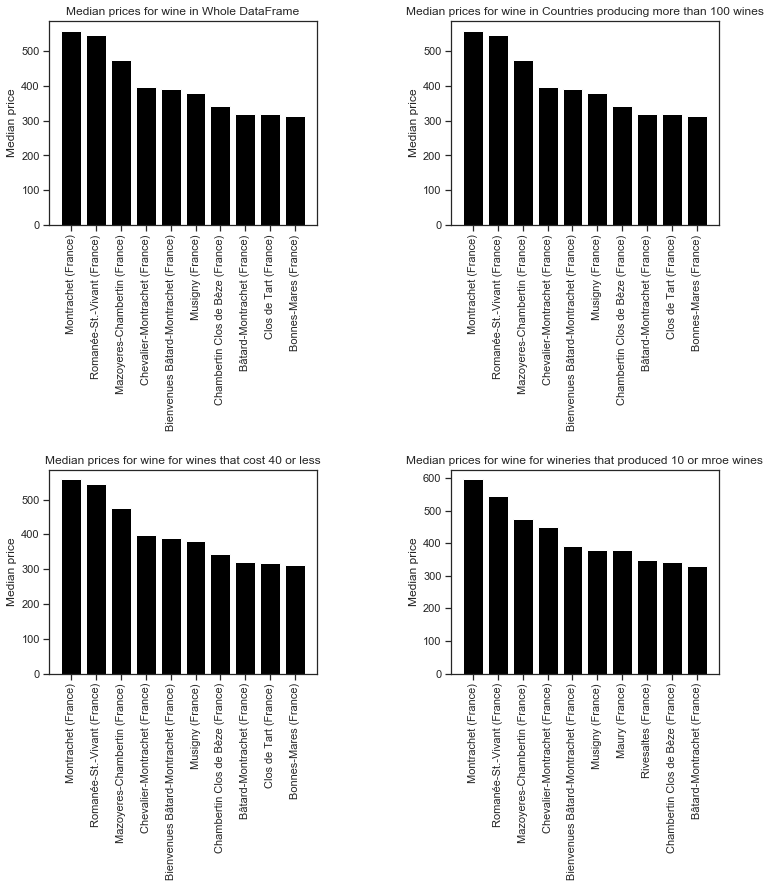

In [37]:
#https://matplotlib.org/tutorials/introductory/pyplot.html

plt.figure(1, figsize=(12,12))

plt.subplot(221)
get_best_wine_grouped_chart(df,'region_1','price', False, 10, 'median');
plt.ylabel('Median price')
plt.title('Median prices for wine in Whole DataFrame')
plt.xticks(rotation=90)
plt.subplot(222)
get_best_wine_grouped_chart(df_country_100,'region_1','price', False, 10, 'median');
plt.ylabel('Median price')
plt.title('Median prices for wine in Countries producing more than 100 wines')
plt.xticks(rotation=90)
plt.subplot(223)
get_best_wine_grouped_chart(df,'region_1','price', False, 10, 'median');
plt.ylabel('Median price')
plt.title('Median prices for wine for wines that cost 40 or less')
plt.xticks(rotation=90)
plt.subplot(224)
get_best_wine_grouped_chart(df_winery_10,'region_1','price', False, 10, 'median');
plt.title('Median prices for wine for wineries that produced 10 or mroe wines')
plt.ylabel('Median price')
plt.xticks(rotation=90)


plt.subplots_adjust(hspace = 1.2, wspace= 0.5)

plt.show();

In [38]:
df.groupby(['region_1'])['price'].median().sort_values(ascending=False)[:6]

region_1
Montrachet                      558.0
Romanée-St.-Vivant              545.0
Mazoyeres-Chambertin            475.0
Chevalier-Montrachet            398.0
Bienvenues Bâtard-Montrachet    391.0
Musigny                         380.0
Name: price, dtype: float64

# Highest Median Prices by Region

The plot indicate the predominant role of France by having many regions with the highest median prices for wine. In the full data sets, as well as in all subject, Regions in France are the predominant supplier for highly priced wines. The top 6 within the charts are the same regions throughout all plots. Montrachet (Medain Price 558), Romanée-St.-Vivant (Medain Price 545), Mazoyeres-Chambertin (Median Price 475), Chevalier-Montrachet (Median Price 398),Bienvenues Bâtard-Montrachet (Median Price 391) and Musigny (Median Price 380) are the most expensive regions regarding median prices. 

**next**
- Which regions provide the best quality / price ratio in average?

/Users/Nunu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Nunu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Nunu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

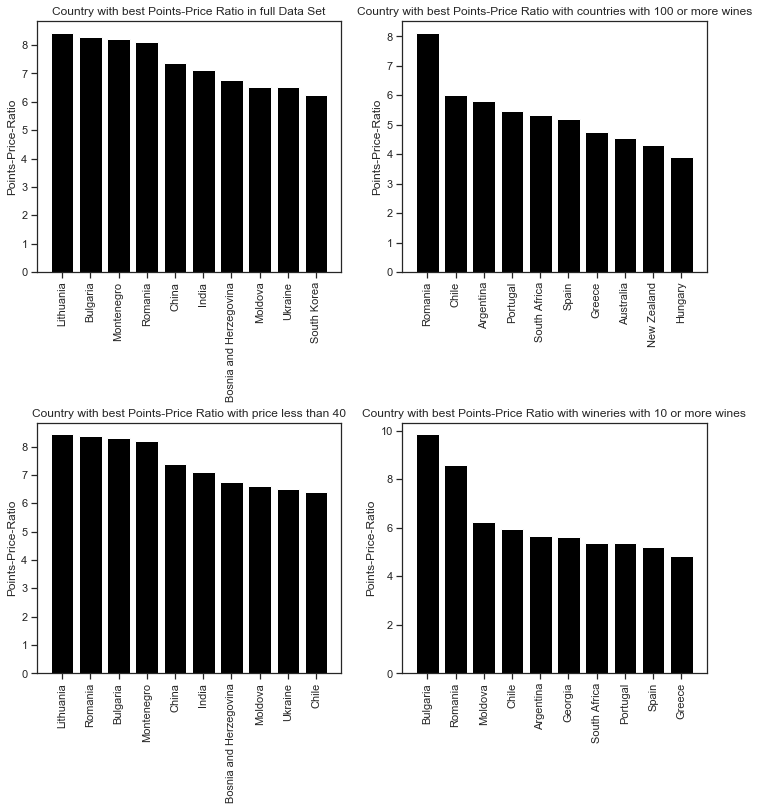

In [39]:
#creating quality/price variable
df['points_price_ratio'] = df['points'] / df['price']
df_country_100['points_price_ratio'] = df['points'] / df['price']
df_price_40['points_price_ratio'] = df['points'] / df['price']
df_winery_10['points_price_ratio'] = df['points'] / df['price']

#plotting charts
plt.figure(1, figsize=(12,12))

plt.subplot(221)
get_best_wine_grouped_chart(df, 'country', 'points_price_ratio', False, 10, 'mean')
plt.xticks(rotation=90)
plt.ylabel('Points-Price-Ratio')
plt.title('Country with best Points-Price Ratio in full Data Set')

plt.subplot(222)
get_best_wine_grouped_chart(df_country_100, 'country', 'points_price_ratio', False, 10, 'mean')
plt.xticks(rotation=90)
plt.ylabel('Points-Price-Ratio')
plt.title('Country with best Points-Price Ratio with countries with 100 or more wines')


plt.subplot(223)
get_best_wine_grouped_chart(df_price_40, 'country', 'points_price_ratio', False, 10, 'mean')
plt.xticks(rotation=90)
plt.ylabel('Points-Price-Ratio')
plt.title('Country with best Points-Price Ratio with price less than 40')


plt.subplot(224)
get_best_wine_grouped_chart(df_winery_10, 'country', 'points_price_ratio', False, 10, 'mean')
plt.xticks(rotation=90)
plt.ylabel('Points-Price-Ratio')
plt.title('Country with best Points-Price Ratio with wineries with 10 or more wines')

plt.subplots_adjust(hspace = 0.6)

plt.show();


# Best Points-Price-Ratio 

The data set indicates that the best points-price-ratio mainly happens in develping countries, mainly beacuse of cheaper prices of the wines. The chart show the need to subset the data by price level, to compare different segments of the wines. 

In [40]:
#Creating variable Price levels according to
#pricequantile(0.25,.5,.75,.9,1)
bin_edges = [4,16,25,40,60,2300]

bin_names = ['very low' ,'low' ,'medium' ,'high', 'very high' ] 
df['price_level'] = pd.cut(df['price'], bin_edges, labels=bin_names)

#Creating variable quality_levels according to
#points quantile(0.25,.5,.75,.9,1)
bin_edges_points = [80,86,88,90,92,100]

bin_names_points = ['very low' ,'low' ,'medium' ,'high', 'very high' ] 
df['quality_level'] = pd.cut(df['points'], bin_edges_points, labels=bin_names_points)


#Creating necessary DF
df_price_very_low = df.query('price_level == "very low"')
df_price_low = df.query('price_level == "low"')
df_price_medium = df.query('price_level == "medium"')
df_price_high = df.query('price_level == "high"')
df_price_very_high = df.query('price_level == "very high"')

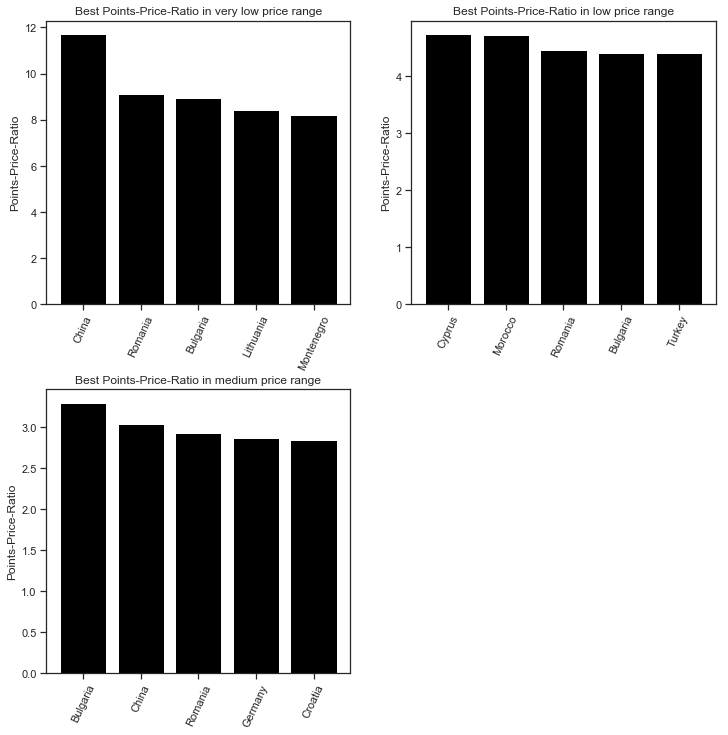

In [41]:
#creating plots
plt.figure(1, figsize=(12,12))

plt.subplot(221)
get_best_wine_grouped_chart(df_price_very_low, 'country', 'points_price_ratio', False, 5, 'mean')
plt.ylabel('Points-Price-Ratio')
plt.title('Best Points-Price-Ratio in very low price range')

plt.subplot(222)
get_best_wine_grouped_chart(df_price_low, 'country', 'points_price_ratio', False, 5, 'mean')
plt.ylabel('Points-Price-Ratio')
plt.title('Best Points-Price-Ratio in low price range')

plt.subplot(223)
get_best_wine_grouped_chart(df_price_medium, 'country', 'points_price_ratio', False, 5, 'mean')
plt.ylabel('Points-Price-Ratio')
plt.title('Best Points-Price-Ratio in medium price range')

plt.subplots_adjust(hspace = 0.3)

plt.show();

In [42]:
df_price_very_low.groupby(['country'])['price'].mean().sort_values(ascending=True)[:5]

country
China          7.000000
Romania        9.869048
Montenegro    10.000000
Lithuania     10.000000
Bulgaria      10.081633
Name: price, dtype: float64

# Best Points-Price-Ratio from very low to medium segment in countries
Here the data frame shows a different picture. In the very low price segment (0-0.25 quantile) China, Romania, Bulgaria and Lithuania and Montenegro offer the best points / price ratio. Interestingly these are the countries with the cheapest wine in average, which boosts the points / price ratio. Nevertheless, China reaches almost a points / wine ratio of 12, while the other countries reach values from 8-9.

The low price segment (0.25-0.5 quantile) show very different values. Here, the top countries reach best price / points ratio of 4-5, indicating higher prices for wine. Only Bulgaria from the first segment is among the better players in this price segment, otherwise Cyprus, Morocco, Romania and Turkey are represented in the list.

In The medium price segment (0.5-0.75 quantile) we can again obsorve lower points-price-ratos than in the previous group. Interestingly, 3 representatives of the very low price segment are the most successful players in thiss price segment. Bulgaria, China and Romnia are among the leading countries in this segment, wich a ratio around 3.

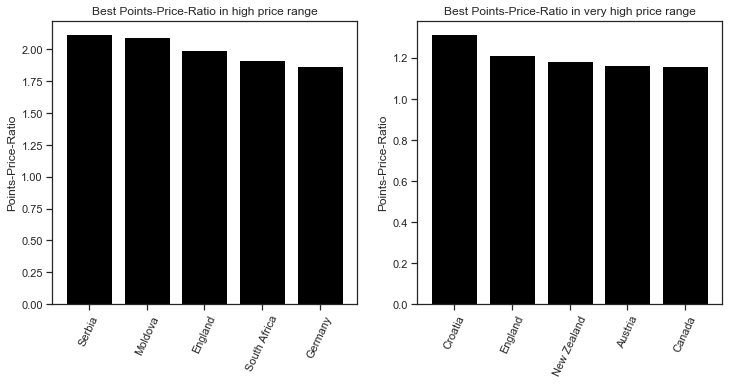

In [43]:
#creating plots
plt.figure(1, figsize=(12,12))

plt.subplot(221)
get_best_wine_grouped_chart(df_price_high, 'country', 'points_price_ratio', False, 5, 'mean')
plt.ylabel('Points-Price-Ratio')
plt.title('Best Points-Price-Ratio in high price range')

plt.subplot(222)
get_best_wine_grouped_chart(df_price_very_high, 'country', 'points_price_ratio', False, 5, 'mean')
plt.ylabel('Points-Price-Ratio')
plt.title('Best Points-Price-Ratio in very high price range')

plt.subplots_adjust(hspace = 0.3)

plt.show();

# Best Points-Price-Ratio from high to very high segment in countries

Within the high price segment (0.75-0.9 quantile) Serbia, Moldova, England, South Africa and Germany score the best ratios. With ratios from 1.8-2.1, the ratios are again much smaller than in lower price segments. Nevertheless, the chart indicates that less famous countries for wine offer better points / price ratios than famous wine countries as France, Australia, US, etc. It indicates that wine lowers could have a better look on wines from Serbia.

In the very high price segment (0.9-1 quantile), we can observe that Croatia, England, New Zealand, Austria and Canada offer the best wines. Ratios reach between 1.1 and 1.3 and are again lower than all previous segments, because of the price. 

/Users/Nunu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


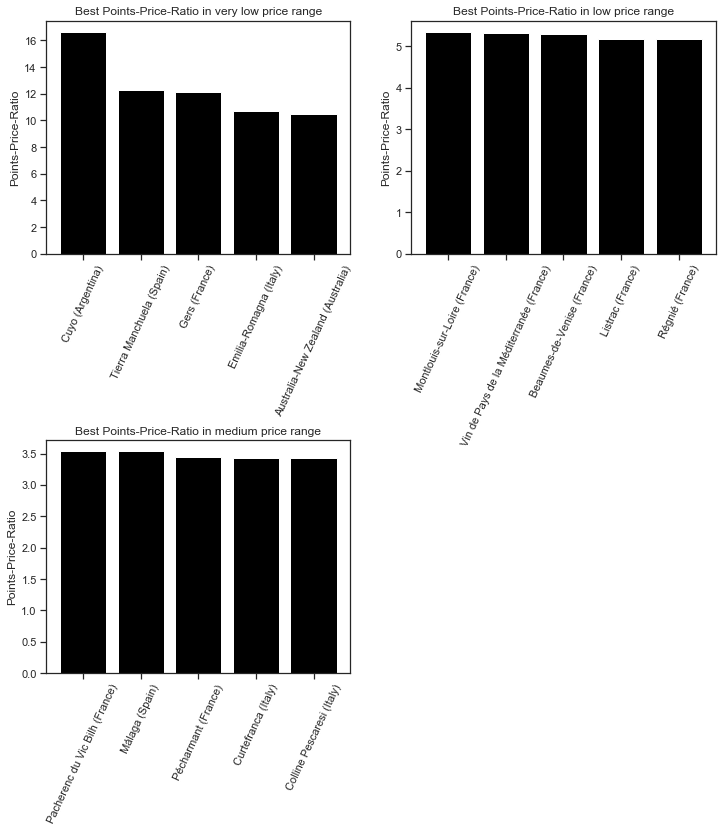

In [44]:
#creating plots
plt.figure(1, figsize=(12,12))

plt.subplot(221)
get_best_wine_grouped_chart(df_price_very_low, 'region_1', 'points_price_ratio', False, 5, 'mean')
plt.ylabel('Points-Price-Ratio')
plt.title('Best Points-Price-Ratio in very low price range')

plt.subplot(222)
get_best_wine_grouped_chart(df_price_low, 'region_1', 'points_price_ratio', False, 5, 'mean')
plt.ylabel('Points-Price-Ratio')
plt.title('Best Points-Price-Ratio in low price range')

plt.subplot(223)
get_best_wine_grouped_chart(df_price_medium, 'region_1', 'points_price_ratio', False, 5, 'mean')
plt.ylabel('Points-Price-Ratio')
plt.title('Best Points-Price-Ratio in medium price range')


plt.subplots_adjust(hspace = 0.8)


plt.show();

# Best Points-Price-Ratio from low to medium segment in regions

The region analysis shows completly different results as the country analysis. Interestingly, the best ratios in low to medium price segments can be found in regions of Argentina, Spain, France and Italy. A totally different picture that we saw in the country analysis. The data indicates, that there are many regions within the famous wine countries that produce wine with a very high points-price-ratio, but overall the country averages in the famous countries offer lower points-price-ratios. This indicates that very good points-price-ratios can be found within the famous wine producing countries, an interested person just need to pick the right spots. 

/Users/Nunu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


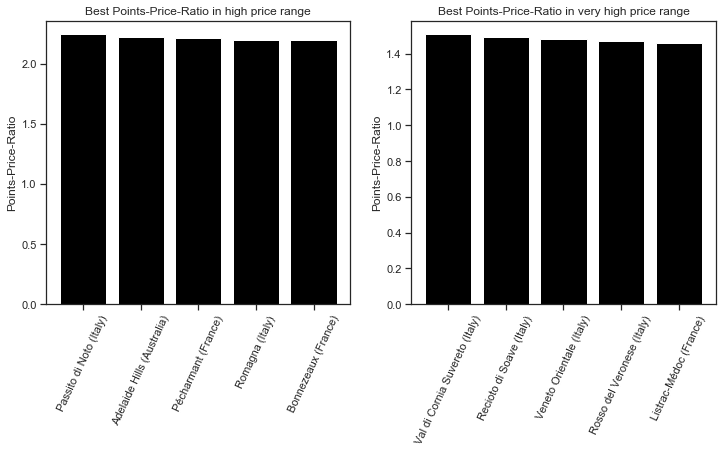

In [45]:
#creating plots
plt.figure(1, figsize=(12,12))

plt.subplot(221)
get_best_wine_grouped_chart(df_price_high, 'region_1', 'points_price_ratio', False, 5, 'mean')
plt.ylabel('Points-Price-Ratio')
plt.title('Best Points-Price-Ratio in high price range')

plt.subplot(222)
get_best_wine_grouped_chart(df_price_very_high, 'region_1', 'points_price_ratio', False, 5, 'mean')
plt.ylabel('Points-Price-Ratio')
plt.title('Best Points-Price-Ratio in very high price range')

plt.subplots_adjust(hspace = 0.3)

plt.show();

# Best Points-Price-Ratio from high to very high segment in regions

In the higher price segments regions in Italy, Australia and France are among the regions with the best points-price-ratios. The high price segment offers best ratios of around 2 and the very high price segment around 1.4. It is very interesting to see that a certain region is not represented within different segments, indicating that a certain region sticks to a price range through the whole region. 


# Multivariate Plots

## This section will introduce bivariate plots to help us gain further insights in the data set

### Scatter plot of points price colored by country

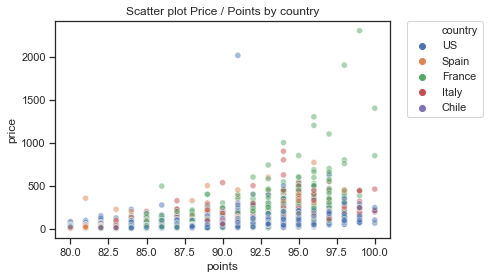

In [46]:
sns.scatterplot(x="points", y="price", hue="country", alpha=0.5,
                  data=df[(df['country'].isin(get_top_5_value_counts(df, 'country')['country']))]);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Scatter plot Price / Points by country')

plt.show();

## Interesting clusters in higher quality segments

The plot above indicates that US wines are dominant in higher wine quality segments with cheaper prices. They tend to offer high quality wines (above 95 points) to lower prices than the other countries. France seems to position themselves in higher price regions for the same quality of wine. Maybe some famous wine brands can allow themselves to offer high prices wines. 


### Scatter plot of points price colored by country with prices up to 100

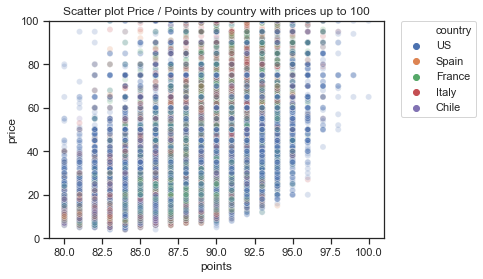

In [47]:
sns.scatterplot(x="points", y="price", hue="country", alpha=0.2,
                  data=df[(df['country'].isin(get_top_5_value_counts(df, 'country')['country']))]);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0,100)
plt.title('Scatter plot Price / Points by country with prices up to 100')
plt.show();

## US wines dominant in the sample

The plot seem to be overplotted due to the large amount of us samples in the data set. Its hard to draw any conclusions, except that US wines are very present in the price region of 0 - 100 us Dollars with all kinds of qualities. 

### Scatter plot of points price colored by country with prices up to 100 without US

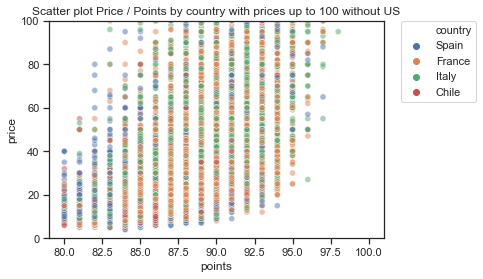

In [48]:
sns.scatterplot(x="points", y="price", hue="country", alpha=0.5,
                  data=df.query('country == "Spain" | country == "France" | country == "Italy" | country == "Chile"'));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0,100)
plt.title('Scatter plot Price / Points by country with prices up to 100 without US')
plt.show();

## France dominating lower price segments

The plot reveals interesting clusters by removing the US from the data set. It indicates that France has wines in all price ranges between (0-100) and is dominating the lower price segments for higher quality wines. The chart also reveals that italy tend to have higher prices for equaly rated wine with France. Even more, the chart reveals that expensive "bad" wine (points below 85) are more frequently produced in spain. 


# Having a closer look in a countries province

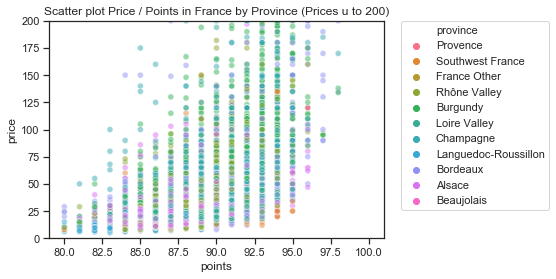

In [49]:
sns.scatterplot(x="points", y="price", hue="province", alpha=0.5,
                  data=df.query('country=="France"'));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Scatter plot Price / Points in France by Province (Prices u to 200)')
plt.ylim(0,200)
plt.show();

The upper chart indicates that there are 11 provinces in France where wine is grown. The data set indicates that Wines from Burgundy, Loire Valeey and Champagne tend to have higher prices (over 60). The visualization was limited to the price of 200, to reduce overplotting.  Interestingly Southwest France, Alsance, Beaujolais seem to produce as well very good wines that are much cheaper than the ones from Burgundy, Loire Valeey or Champagne.
Wines from Languedoc-Roussillon seem to produce wines with lower qualities to low prices. The plot indicates as well that wines with lower qualities within a higher price range tend to come from the Loire Valley, Burgundy or Bordeaux. 

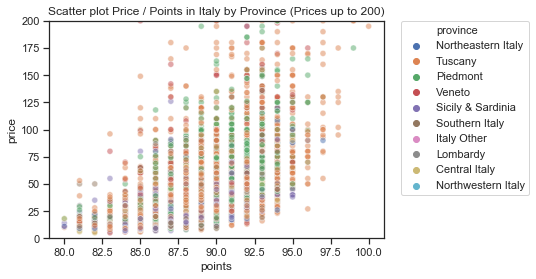

In [50]:
sns.scatterplot(x="points", y="price", hue="province", alpha=0.5,
                  data=df.query('country=="Italy"'));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Scatter plot Price / Points in Italy by Province (Prices up to 200)')

plt.ylim(0,200)


plt.show();


This plot visualizes the distribution the price / points received by region in Italy. It indicates that many wines from the sample are produced in Tuscany and Peidmont. These regions dominate the higher price and quality segments  of wines in italy. Sicil and Central Italy tend to produce lower quality wines with lower prices.

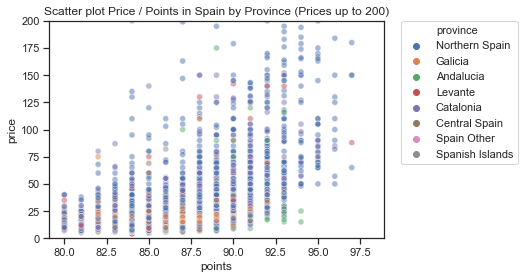

In [51]:
sns.scatterplot(x="points", y="price", hue="province", alpha=0.5,
                  data=df.query('country=="Spain"'));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Scatter plot Price / Points in Spain by Province (Prices up to 200)')
plt.ylim(0,200)
plt.show();


The plot indicates the predominant role of Northern Spain in the data set. The wine found in Northern Spain ranges from low to high quality and from low to high price. Interestingly, wines from Galicia and Andalucia seem to produce high qualitiy wines for a lower price. 

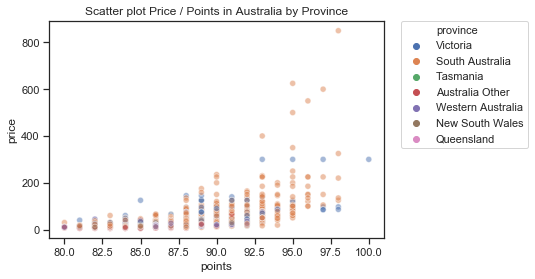

In [52]:
sns.scatterplot(x="points", y="price", hue="province", alpha=0.5,
                  data=df.query('country=="Australia"'));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Scatter plot Price / Points in Australia by Province')
#plt.ylim(0,200)
plt.show();


The provices in Australia procude all kinds of quality wines. Some very expensive and high quality wines can be found in the provinces of South Australia and Victoria. The region of South Australia seems to be dominant in the dataset, producing medium quality to high quality wines in all price ranges. 

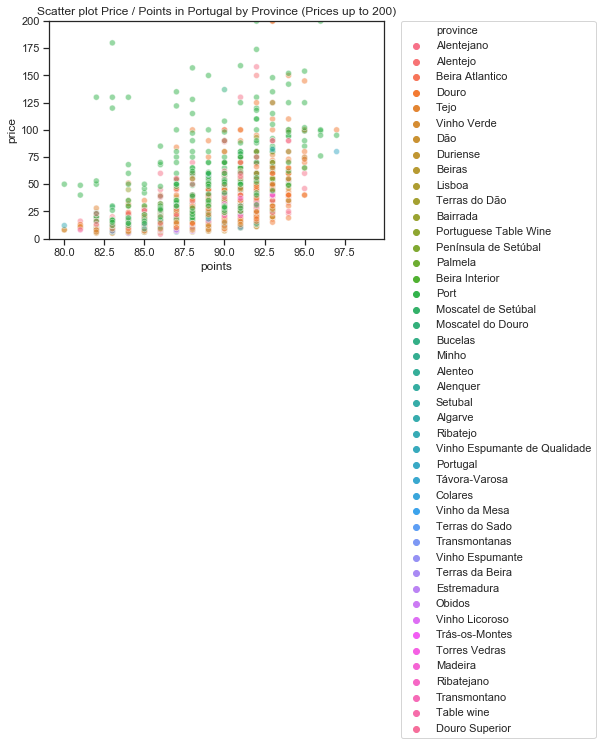

In [53]:
sns.scatterplot(x="points", y="price", hue="province", alpha=0.5,
                  data=df.query('country=="Portugal"'));
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0,200)
plt.title('Scatter plot Price / Points in Portugal by Province (Prices up to 200)')
#plt.savefig("portugal.png", bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)
plt.show();




Portugal has an incredible amount of provinces that produce wine. The regions of Palmela, Beira Interior, Port, Moscatel de Setubal, Moscatel do Douro, as well as Alentejano, Alentejo, Beira Atlantica, Douro and Tejo are very present in the data set. 

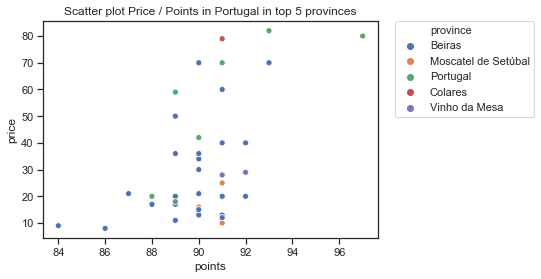

In [54]:
df_portugal = df.query('country == "Portugal"')
sns.scatterplot(x="points", y="price", hue="province", alpha=1,
                  data=df[(df['province'].isin(df_portugal.groupby(['province'])['points'].mean().sort_values(ascending=False)[:5].index))]);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Scatter plot Price / Points in Portugal in top 5 provinces')

plt.show();

The previous chart made clear intepretation of rather difficult, because there were too many provinces. The upper charts shows the 5 provinces with the highest average in points. It indicates that the quality for the cheapest price can be found in Beiras, Moscatel de Setubal, Vinho da Mesa and Portugal. But nevertheless, Portugal and Beiras offer also wines in higher price regions. 

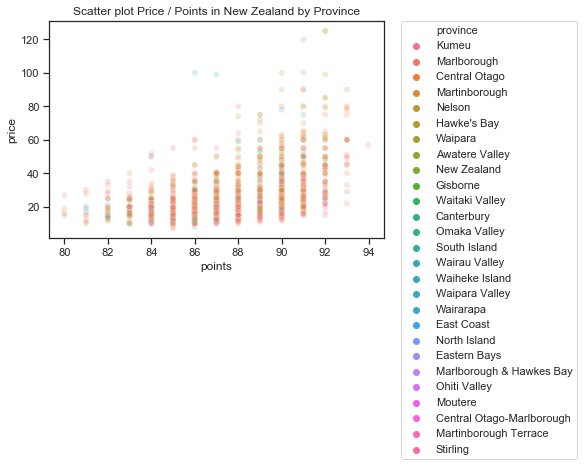

In [55]:
sns.scatterplot(x="points", y="price", hue="province", alpha=0.2,
                  data=df.query('country=="New Zealand"'));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Scatter plot Price / Points in New Zealand by Province')


plt.show();


This chart also has some serious problems with overplotting. It indicates that the provinces of Kumeu, Marlborough, Central Otago and Nelson are among the most frequent wine samples in the data set. It shows that those regions produce many wines with medium to highg quality for a price below 40.  

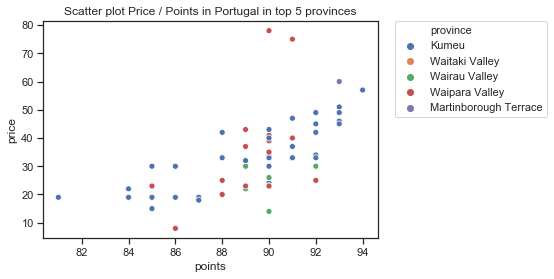

In [56]:
df_new_zealand = df.query('country == "New Zealand"')
sns.scatterplot(x="points", y="price", hue="province", alpha=1,
                  data=df[(df['province'].isin(df_new_zealand.groupby(['province'])['points'].mean().sort_values(ascending=False)[:5].index))]);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Scatter plot Price / Points in Portugal in top 5 provinces')

plt.show();

Having a closer look on the top 5 wine provinces from New Zealand with the highest points in average, Kumeu, Waitaki Valley, Wairau Valley, Waipara Valley and Martinborough Terrace are represented. Dominant in the data set are the provinces of Kumeu and Waipara, producing wine of almost every quality and from prices between 10 and 80, whereras wines from Kumeu have a less variance in their price range (prices from 20 -60). The best wine also is produced in the Kumeu region.

## Best value for money in Top 5 Regions

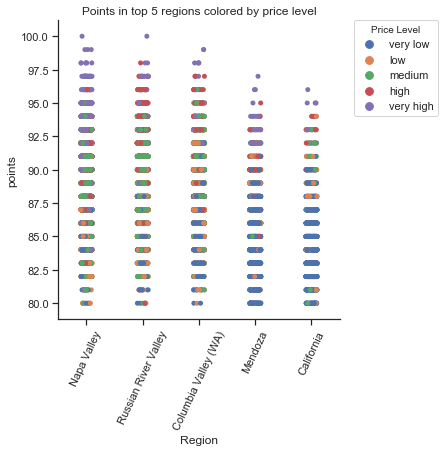

In [57]:
#https://seaborn.pydata.org/tutorial/categorical.html
sns.catplot(x="region_1", y="points", hue="price_level", 
            data=df[df['region_1'].isin(get_top_5_value_counts(df, 'region_1')['region_1'])], legend=False);
plt.xticks(rotation=65)
plt.xlabel('Region')
plt.legend(title='Price Level', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Points in top 5 regions colored by price level')
plt.show();

THe upper chart reveals seveal interesting insights. It indicates that the best quality wine in the very low price segment can be found in California and Mendoza. This is also the case for wine in the low price range, except some very high quality wines can be found in the Columbia Valley (WA) in this price range. In the medium price rang, best wines are found in all of the top 5 region, except in Mendoza. The worst high quality wines are found in the Napa Valley, Russian River Valley and a few in the Columbia Valley. But also the best wines in the high price segment are found in this 3 valley. The chart indicate as well that the best very high priced wines are usually found in the Napa Valley, Russian River Valley and Columbia Valley. 

## Best value for money in Top 5 Countries

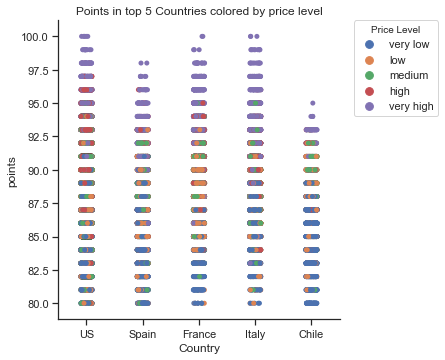

In [58]:
#https://seaborn.pydata.org/tutorial/categorical.html
sns.catplot(x="country", y="points", hue="price_level", jitter=True, 
            data=df[df['country'].isin(get_top_5_value_counts(df, 'country')['country'])], legend=False);
plt.title('Points in top 5 Countries colored by price level')
plt.legend(title='Price Level', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Country')
plt.show();


The upper chart is structured the same ways as the previous chart, but it reveals some interesting insights on a country level. The best wines in a very low price range tend to be found in Chile and Italy, where rather the best low priced wines are found in Chile, France and Spain. Interestingly, the worst quality medium priced wines can be found in Chile, Italy and Spain, wheras the best are located as well in Chile, Italy and France. Good higher priced wines are found in the US and France especially. The best very high priced wines are fouund in the countries of US, France and Italy, all having wines with the maximum score of 100. 

## Comparing Spain and Chile

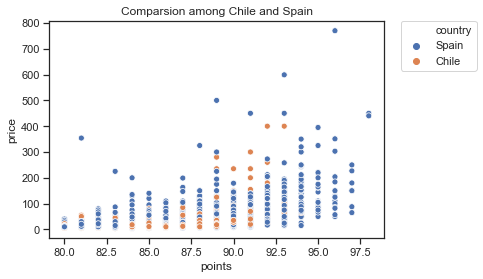

In [59]:
sns.scatterplot(x="points", y="price", hue='country', alpha=1, x_jitter=.5,
                  data=df[(df['country'] == 'Spain') | (df['country'] == 'Chile')]);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparsion among Chile and Spain')
plt.show();


The first chart in this comparison indicates that the data set contains way more samples from Spain than from Chile. It shows that spain is represented in all kind of segments, from very low to very high prices, as well in very low to very high quality segments. Spain tend to produce more wines with very high quality than chile does. But theer also some wines with lower quality scores in a very high price segment. 

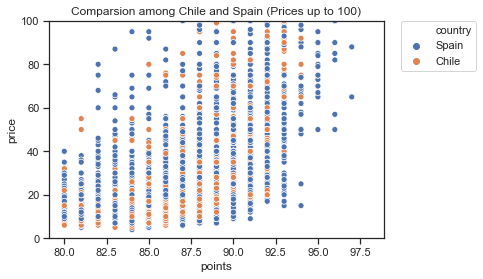

In [60]:
sns.scatterplot(x="points", y="price", hue='country', alpha=1, x_jitter=.5,
                  data=df[(df['country'] == 'Spain') | (df['country'] == 'Chile')]);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.ylim(0,100)
plt.title('Comparsion among Chile and Spain (Prices up to 100)')
plt.show();

A zoom-in to the price range between 0-100 shows more data points for chile. It shows that in the range of 85-90 wines from Chile tend to be cheaper than the ones from spain. The chart also indicates that shile is not able to compete in the quality region of 95+ ploints with spain. On the other hand, the chart indicates that Spain tend to produce some low quality wine for very high prices. 

# Is good wine always expensive?

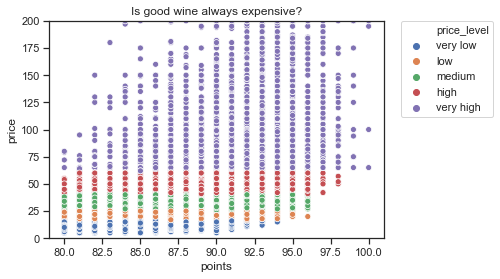

In [61]:
#https://stackoverflow.com/questions/10101700/moving-matplotlib-legend-outside-of-the-axis-makes-it-cutoff-by-the-figure-box
sns.scatterplot(x="points", y="price", hue='price_level',
                data = df);
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.ylim(0,200)
plt.title('Is good wine always expensive?')
#plt.savefig('price-level.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

plt.show();

The plot clearly indicates: NO! Good wine does not necessarily need to be expensive. Very low wine categories reach scores up to 93 points, low wine categories even up 96. This is also the maximum for all medium price level wines. Indicating that there is no need to buy medium priced wine, as there is no increase in quality. Higher priced wines add up in quality, reaching maximum scores of around 98. Only very high priced wines scored more than 98 points. The chart further indicates that in all quality levels, all kind of price ranges can be found.

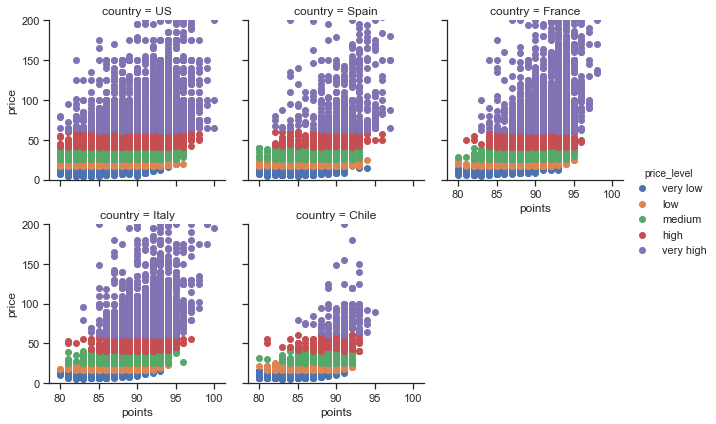

In [62]:
#https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

g = sns.FacetGrid(df[(df['country'].isin(get_top_5_value_counts(df, 'country')['country']))], col="country", hue="price_level", col_wrap=3)
g = (g.map(plt.scatter, "points", "price").add_legend())
plt.ylim(0,200)
plt.show();

The upper plot shows the difference of wine categories in the top 5 countries according to wine samples in the data set. It is interesting to see that up to a price level of 200, the United States seem to offer better wines in all price levels than France, Spain and Chile. Only Italy is able to compete with the wines from the US. It is interesting to see that all countries except Chile are able to provide high quality wine (95 points) in the medium price range or lower. 

# Inferential Statistics

In [63]:
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

In [64]:
#Preparing df_if (inferential statistics) for analysis by dropping na values from price and points
df['intercept'] = 1
df_if = df.dropna(subset = ['price', 'points'])

# Are the means in poiints of the continents statistically different to each other?

This analysis aims to find statistical evidence that the means of the continents are different to each other. In order to do so, the Anova test will be cunducted. The null hypothesis for ANOVA is that the mean (average value of the dependent variable) is the same for all groups. The alternative or research hypothesis is that the average is not the same for all groups. The ANOVA test procedure produces an F-statistic, which is used to calculate the p-value.

$$ H_{0}: \mu_{c1} = \mu_{c2} .... = \mu_{c7} $$
$$ H_{1}: \mu_{c1} \neq \mu_{c2} .... \neq \mu_{c7} $$

, where $c$ = continent.

For all test a treshold $\alpha = 0.05$ for the p-value was defined.

In [65]:
#Adding continent to DF
#Creating a list of countries in respective continent
europe = ['Spain', 'France', 'Italy', 'Bulgaria', 'Portugal', 
          'Greece', 'Romania', 'Germany', 'Moldova', 'Hungary', 'Austria',
         'Croatia', 'Solvenia', 'Macedonia', 'Serbia', 'Switzerland', 'Albania', 'Bosnia and Herzogovina',
         'Cyprus', 'Lithuania', 'Ukraine', 'England', 'Georgia', 'Montenegro', 'Luxembourg', 'Slovakia',
         'Czech Republic']

south_america = ['Argentina', 'Brazil', 'Mexico', 'Chile', 'Uruguay' ]

north_america = ['US', 'US-France', 'Canada']

asia = ['India', 'Japan', 'China', 'South Korea' ]

pacific = ['New Zealand', 'Australia']

arabic = ['Israel', 'Turkey', 'Lebanon']

africa = ['South Africa', 'Morocco']

continent = []

#adding countries to continent list
for i in df_if['country']: 
    if i in europe:
        continent.append('Europe')
    elif i in south_america:
        continent.append('South America')
    elif i in north_america:
        continent.append('North America')
    elif i in asia:
        continent.append('Asia')
    elif i in pacific:
        continent.append('Pacific')
    elif i in arabic:
        continent.append('Arabic')
    elif i in africa:
        continent.append('Africa')
    else:
        continent.append(np.NAN)

#adding list to dataframe
df_if['continent'] = continent

/Users/Nunu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


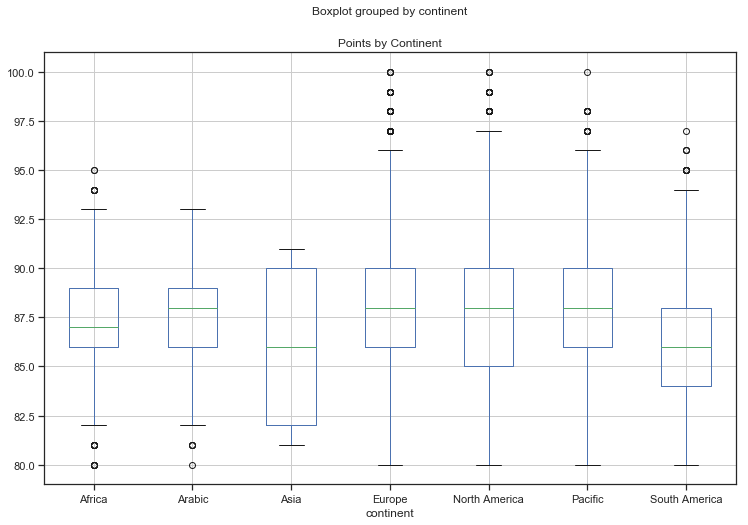

In [66]:
#Boxplot Points in different continents
df_if.boxplot('points', by='continent', figsize=(12, 8));
plt.title('Points by Continent');

The boxplot indicates that there is a different in medians among the continents, but is there as well a diffrence in means that is statistically siginificant?

In [67]:
#https://www.statsmodels.org/stable/anova.html
#Anova test with statsmodels
from statsmodels.formula.api import ols
 
mod = ols('points ~ continent',
                data=df_if).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq       df           F  PR(>F)
continent   26041.885412      6.0  429.931498     0.0
Residual   899052.585311  89056.0         NaN     NaN


In [68]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
#Anova test with scipy
sample_na = df_if.query('continent == "North America"')['points']
sample_europe = df_if.query('continent == "Europe"')['points']
sample_pacific = df_if.query('continent == "Pacific"')['points']
sample_sa = df_if.query('continent == "South America"')['points']
sample_arabic = df_if.query('continent == "Arabic"')['points']
sample_africa = df_if.query('continent == "Africa"')['points']
sample_asia = df_if.query('continent == "Asia"')['points']


statistic, pvalue = stats.f_oneway(sample_na, sample_europe, sample_pacific, sample_sa, sample_arabic,
                                  sample_africa, sample_asia)
statistic, pvalue

(429.9314977334491, 0.0)

## Statistical evidance for difference in means among the continents

Our anova test indicates with an $\alpha=0.01$, that the differences in means are statistically significant, underlined with a p-value of 0.0. So we can indicate with an almost 100% certainty that the mean points are different among the continents. As our f-value, with the corresponding degrees of freedom (Source: statsmodels.org)$^1$ is higher than the corresponding critical value in the f-table of 3.742957414 (Source: Socr.ucla.edu)$^2$ and our p-value is below our treshhold of 0.05.



$^1$https://www.statsmodels.org/dev/generated/statsmodels.stats.anova.anova_lm.html

$^2$http://www.socr.ucla.edu/applets.dir/f_table.html

## Are European wines better than US wines in average?

Our hyptheses in this case is: 

$$ H_{0}: \mu_{europe} \leq \mu_{us}$$
$$ H_{1}: \mu_{europe} > \mu_{us} $$


For all test a treshold $\alpha = 0.05$ for the p-value was defined.

The hypotheses will be tested with a independent T-Test with 2 samples. The Independent Samples t Test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

In [69]:
#creating europe DF and a combined df
df_if_europe = df_if.query('continent == "Europe"')
df_if_us = df_if.query('country == "US"')
df_if_europe_mean = df_if_europe.points.mean()
df_if_us_mean = df_if_us.points.mean()
df_if_us_europe =  pd.concat([df_if_us, df_if_europe])

df_if_us_europe.continent.value_counts()
obs_diff_us_europe = df_if_europe_mean-df_if_us_mean 


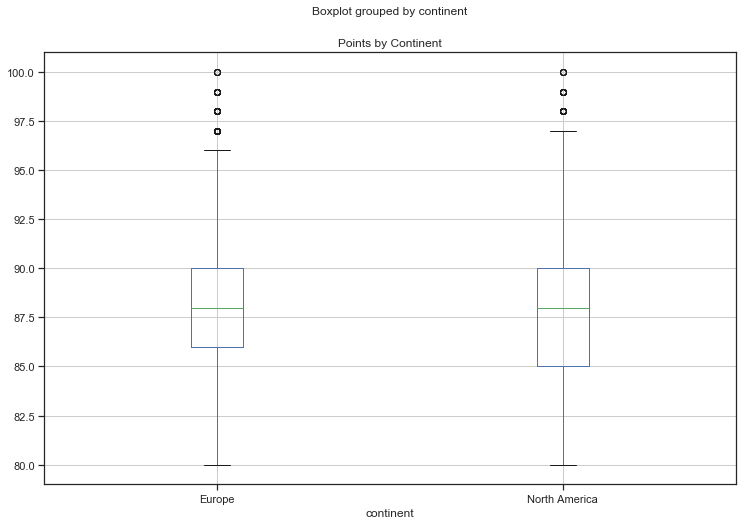

In [70]:
#Boxplot of the two countries wine points
df_if_us_europe.boxplot('points', by='continent', figsize=(12, 8));
plt.title('Points by Continent');

In [71]:
#checking mean values for both groups and observed difference
print('europe mean quality:',df_if_europe_mean,'us mean quality:', df_if_us_mean,  'observed diff:', obs_diff_us_europe)

europe mean quality: 88.21673850782538 us mean quality: 87.90632202423731 observed diff: 0.31041648358807095


In [72]:
# Create a sampling distribution of the difference in means
# with bootstrapping
diffs = []
size = df_if_us_europe.shape[0]

for _ in range(10000):
    b_samp = df_if_us_europe.sample(size, replace=True)
    df_if_europe_mean = b_samp.query('continent == "Europe"').points.mean()
    df_if_us_mean = b_samp.query('country == "US"').points.mean()
    diffs.append(df_if_europe_mean-df_if_us_mean)


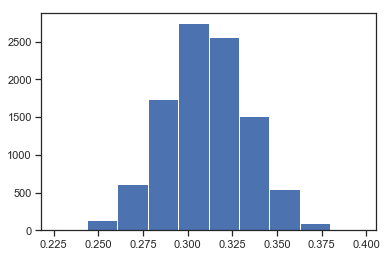

In [73]:
#plotting histogramm of differences
diffs = np.array(diffs)
plt.hist(diffs);

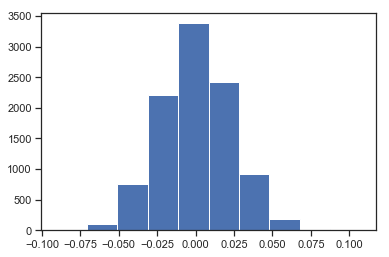

In [74]:
#plotting the histogramm under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)
plt.hist(null_vals);

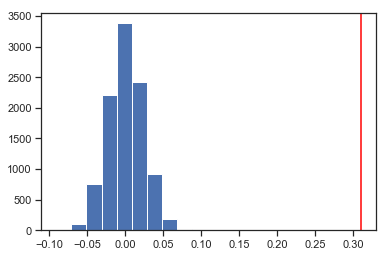

In [75]:
#observed difference and what we expect under the null
plt.hist(null_vals)
plt.axvline(obs_diff_us_europe, c='red');

In [76]:
#calculating the p-value
(null_vals>obs_diff_us_europe).mean()

0.0

In [77]:
#doing the same t_test with statsmodel
sample1 = df_if_europe.points
sample2 = df_if_us.points
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
t_stat, p_val

(13.187713569430619, 1.1437900007602045e-39)

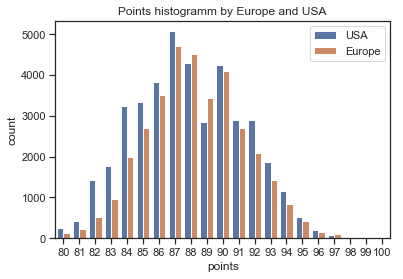

In [78]:
#plotting the histogram of points of the 2 groups
sns.countplot(x='points', hue='continent', data =df_if_us_europe.query('country != "Canada"'));
labels = ['USA', 'Europe']
plt.legend(labels=labels)
plt.title('Points histogramm by Europe and USA')
plt.show()

## European wines produce better average wine than United States

Our test show an almost 100% certainty that European wine is in average better than US-Wine. Our p-value is about $5.362183975076121e^{-42}$, which is a very low p-value. By plotting a histogram seperated by the two groups, the plot indicates that the US produces wines in the same quality range as europe, but many more wines in the lower quality end are produced in the us, what influences the mean quality. 

# Are European wines better than pacific wine in average?

Our hyptheses in this case is: 

$$ H_{0}: \mu_{europe} \leq \mu_{pacific}$$
$$ H_{1}: \mu_{europe} > \mu_{pacific} $$


For all test a treshold $\alpha = 0.05$ for the p-value was defined.

The hypotheses will be tested with a independent T-Test with 2 samples. The Independent Samples t Test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

In [79]:
#creating europe DF and a combined df
df_if_pacific = df_if.query('continent == "Pacific"')
df_if_pacific_mean = df_if_pacific.points.mean()
df_if_europe_pacific =  pd.concat([df_if_europe, df_if_pacific])

obs_diff_europe_pacific = df_if_europe_mean-df_if_pacific_mean
obs_diff_europe_pacific

0.4135743542782251

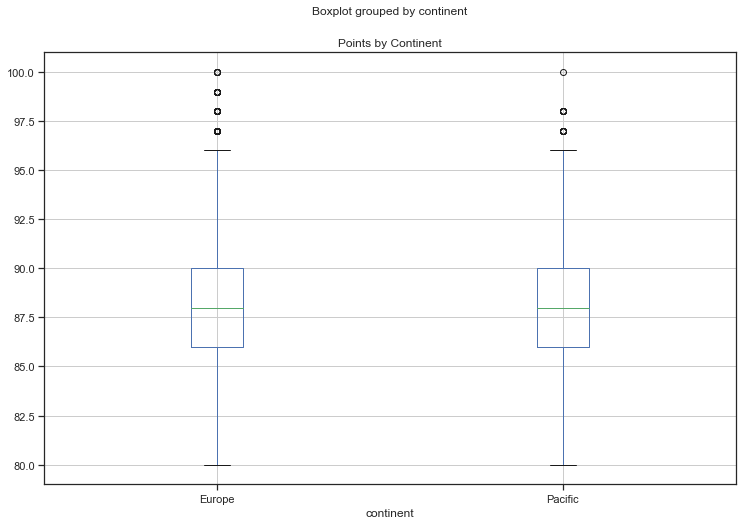

In [80]:
df_if_europe_pacific.boxplot('points', by='continent', figsize=(12, 8));
plt.title('Points by Continent');

The boxplot indicates that both regions cover the same range of wine quality and have a similar median value, but the difference in mean (0.44454) is considerably high.

In [81]:
# Create a sampling distribution of the difference in means
# with bootstrapping
diffs_europe_pacific = []
size = df_if_europe_pacific.shape[0]

for _ in range(10000):
    b_samp = df_if_europe_pacific.sample(size, replace=True)
    df_if_europe_mean = b_samp.query('continent == "Europe"').points.mean()
    df_if_pacific_mean = b_samp.query('continent == "Pacific"').points.mean()
    diffs_europe_pacific.append(df_if_europe_mean-df_if_pacific_mean) 


In [82]:
#creating a NumPy array out of the list
diffs_europe_pacific = np.array(diffs_europe_pacific)

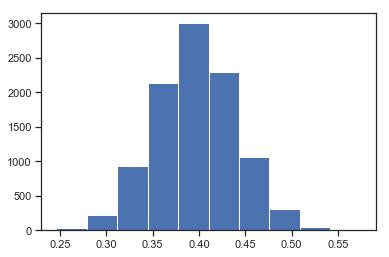

In [83]:
#plotting the difference histogramm
plt.hist(diffs_europe_pacific);

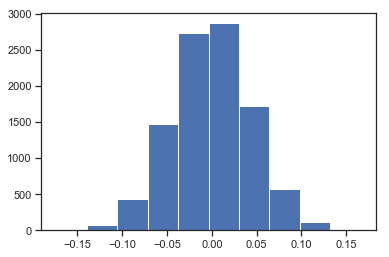

In [84]:
#Plotting the expected distribution under the 0-hypothesis
null_vals = np.random.normal(0, diffs_europe_pacific.std(), diffs_europe_pacific.size)
plt.hist(null_vals);

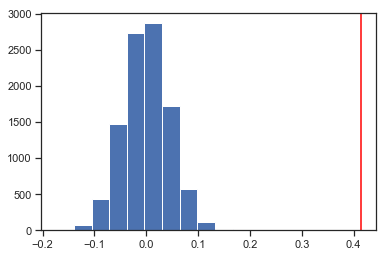

In [85]:
#0-diistribution in relation to observed difference
plt.hist(null_vals)
plt.axvline(obs_diff_europe_pacific, c='red');

In [86]:
#calculating the p-value
(null_vals > obs_diff_europe_pacific).mean()

0.0

In [87]:
#doing the same test with stats
sample1 = df_if_europe_pacific.query('continent == "Europe"')['points']
sample2 = df_if_europe_pacific.query('continent == "Pacific"')['points']
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
t_stat, p_val

(9.069485603421896, 1.555339497958667e-19)

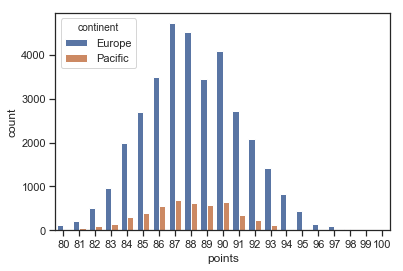

In [88]:
#plotting us and pacific wine
sns.countplot(x='points', hue='continent', data =df_if_europe_pacific);

## Europe also with better wine than the Pacific

Also this test revealed that europe produces better wine than the pacific region on average. With a very low p-value of $1.555339497958667e^{-19}$, we can argue with almost a certainty of 100% that this is the case.

# Chile Spain comparison

Our hyptheses in this case is: 

$$ H_{0}: \mu_{spain} - \mu_{chile} \leq 0$$
$$ H_{1}: \mu_{spain} - \mu_{chile} > 0$$


For all test a treshold $\alpha = 0.05$ for the p-value was defined.

The hypotheses will be tested with a independent T-Test with 2 samples. The Independent Samples t Test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

In [89]:
df_if_chile = df_if.query('country == "Chile"')
df_if_spain = df_if.query('country == "Spain"')
df_if_spain_chile = pd.concat([df_if_chile, df_if_spain])

obs_diff_spain_chile = df_if_spain['points'].mean() - df_if_chile['points'].mean()
obs_diff_spain_chile

0.47186300748150245

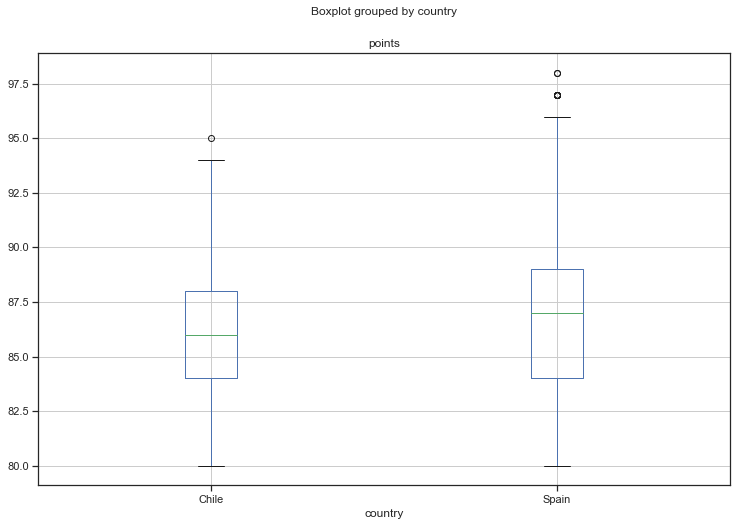

In [90]:
df_if_spain_chile.boxplot('points', by='country', figsize=(12, 8));

Our boxplot, as well as the calculated difference in mean already show big differences in median and mean values. But is it statistically siginificant?

In [91]:
# Create a sampling distribution of the difference in means
# with bootstrapping

diff_spain_chile =[]
size = df_if_spain_chile.shape[0]

for _ in range(10000):
    b_samp = df_if_spain_chile.sample(size, replace=True)
    df_if_spain = b_samp.query('country == "Spain"')
    df_if_chile = b_samp.query('country == "Chile"')
    diff_spain_chile.append(df_if_spain['points'].mean() - df_if_chile['points'].mean())

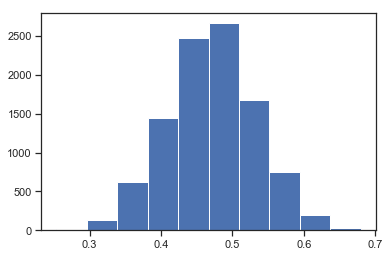

In [92]:
diff_spain_chile = np.array(diff_spain_chile)
plt.hist(diff_spain_chile);

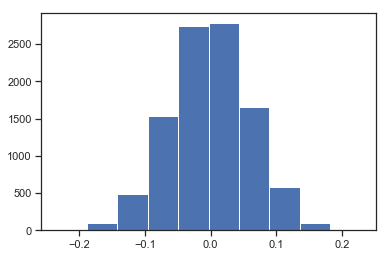

In [93]:
null_vals = np.random.normal(0, diff_spain_chile.std(), diff_spain_chile.size)
plt.hist(null_vals);

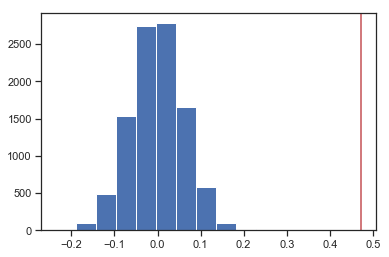

In [94]:
plt.hist(null_vals)
plt.axvline(obs_diff_spain_chile, color='r');

In [95]:
(null_vals > obs_diff_spain_chile).mean()

0.0

In [96]:
#doing the same test with stats
sample1 = df_if_spain_chile.query('country == "Spain"')['points']
sample2 = df_if_spain_chile.query('country == "Chile"')['points']
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
t_stat, p_val

(7.5867969532310475, 3.6211094085620933e-14)

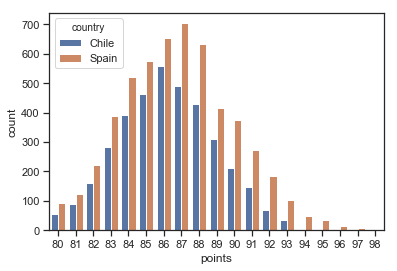

In [97]:
sns.countplot(x='points', hue='country', data =df_if_spain_chile);

## Spain produce better wine in average than Chile

Both wys of conducting t-test revealed that spain produces better wine than chile on average. With a very low p-value of $3.6211094085620933e^{-14}$, we can argue with almost a certainty of 100% that this is the case.
The chart reveals that chile has way more wine in the lower quality range than in higher quality ranges. This is also the case for spain, but nevertheless, spain has more wines present in the higher wine quality ranges.

# Is there a signifficant difference in mean points within the different price levels?

This analysis aims to find statistical evidence that the means of the continents are different to each other. In order to do so, the Anova test will be cunducted. The null hypothesis for ANOVA is that the mean (average value of the dependent variable) is the same for all groups. The alternative or research hypothesis is that the average is not the same for all groups. The ANOVA test procedure produces an F-statistic, which is used to calculate the p-value.

$$ H_{0}: \mu_{pl1} = \mu_{pl2} .... = \mu_{pl5} $$
$$ H_{1}: \mu_{pl1} \neq \mu_{pl2} .... \neq \mu_{pl5} $$

, where $pl$ = price level.

For all test a treshold $\alpha = 0.05$ for the p-value was defined.

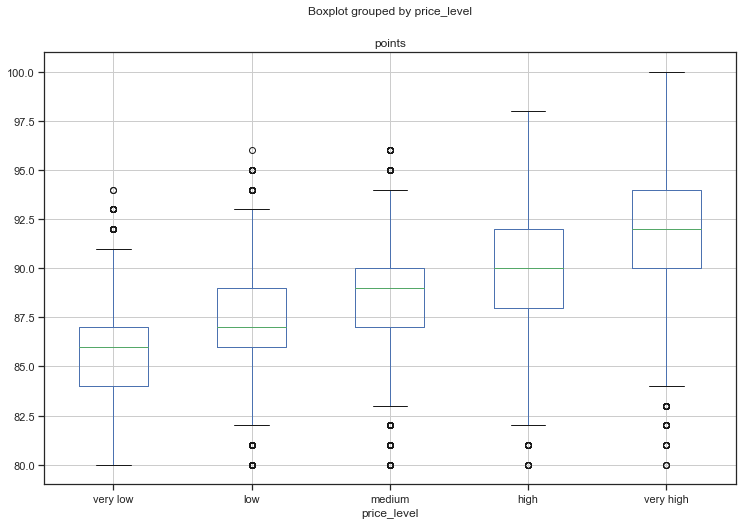

In [98]:
df_if.boxplot('points', by='price_level', figsize=(12, 8));

In [99]:
df_very_low = df.query('price_level == "very low"')
df_low = df.query('price_level == "low"')
df_medium = df.query('price_level == "medium"')
df_high = df.query('price_level == "high"')
df_very_high = df.query('price_level == "very high"')

In [100]:
mod = ols('points ~ price_level',
                data=df_if).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq       df             F  PR(>F)
price_level  320501.323016      4.0  11807.189832     0.0
Residual     604740.740742  89114.0           NaN     NaN


In [101]:
statistic, pvalue = stats.f_oneway(df_very_low['points'],df_low['points'], df_medium['points'], df_high['points'], df_very_high['points'])
statistic, pvalue

(11807.189831533353, 0.0)

## Significant differences in quality scores by price level

The Anova test revealed that quility scores are significant different by grouping them into different price levels. The boxplot indicates that the higher the price_level is, the higher the median quality is. 

# Are wines in medium price range better than wines in lower prices classes? 

Our hyptheses in this case is: 

$$ H_{0}: \mu_{pl_{medium}} - \mu_{pl_{lower}} > 0 $$
$$ H_{1}: \mu_{pl_{medium}} - \mu_{pl_{lower}} \leq 0$$


For all test a treshold $\alpha = 0.05$ for the p-value was defined.

The hypotheses will be tested with a independent T-Test with 2 samples. The Independent Samples t Test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

In [102]:
df_lower = df.query('price_level == "very low" | price_level =="low"')
df_med_low = pd.concat([df_medium, df_lower])
obs_diff_med_low = df_medium.points.mean() - df_lower.points.mean()


In [103]:
diffs_med_low = []
size = df_med_low.shape[0]

for _ in range(10000):
    b_samp = df_med_low.sample(size, replace=True)
    df_lower_mean = b_samp.query('price_level == "very low" | price_level =="low"').points.mean()
    df_medium_mean = df.query('price_level == "medium"').points.mean()
    diffs_med_low.append(df_medium_mean - df_lower_mean)

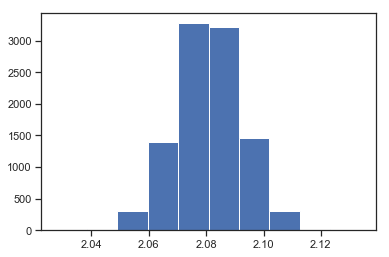

In [104]:
diffs_med_low = np.array(diffs_med_low)
plt.hist(diffs_med_low);

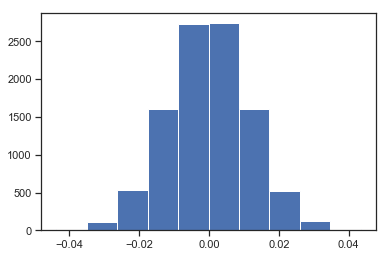

In [105]:
null_vals = np.random.normal(0, diffs_med_low.std(), diffs_med_low.size)
plt.hist(null_vals);

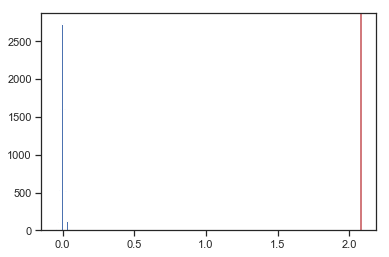

In [106]:
plt.hist(null_vals)
plt.axvline(obs_diff_med_low, color='r');

In [107]:
(null_vals < obs_diff_med_low).mean()

1.0

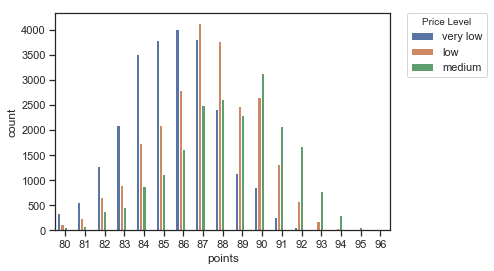

In [108]:
new_labels = ['very low', 'low', 'medium']
sns.countplot(x='points', hue='price_level', data =df_med_low);

#https://stackoverflow.com/questions/23037548/change-main-plot-legend-label-text
plt.legend(labels=new_labels, title='Price Level', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ;
plt.show();

# Medium wines with better quality in average

The analysis showed that medium quality wines reach higher points in average. We would not reject the null hypothesis in that case and stick with our null-hypothesis, since the p-value is equal to 1. 

# Modelling

In [123]:
#get dummies for continents
df_lm = pd.concat([df_if, pd.get_dummies(df_if['continent'])], axis=1)

In [124]:
#adjust function top_value_counts
def get_top_value_counts(dataframe, col, num):
    full_dic = {}
    for index, value in zip(dataframe[col].value_counts().index, dataframe[col].value_counts()):
        full_dic[index] = value
    df_full_dic = pd.DataFrame.from_dict(full_dic, orient='index', columns=['count'])
    df_full_dic = df_full_dic.reset_index()
    df_full_dic = df_full_dic.rename(columns={'index' : col})
    df_full_dic_top5 = df_full_dic.iloc[:num,:]
    return df_full_dic_top5   

In [125]:
#create dummy variable for top 100 wineraries
top_wineries = get_top_value_counts(df_if, 'winery', 100)['winery'].tolist()


lm_winery = []

for i in df_if['winery']:
    if i in top_wineries:
        lm_winery.append(i)
    else:
        lm_winery.append('Other Winery')

#adding list to dataframe
df_if['lm_winery'] = lm_winery

/Users/Nunu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [126]:
#add df_if.winery to df_lm
df_lm = pd.concat([df_lm, pd.get_dummies(df_if['lm_winery'])], axis=1)


In [127]:
#preparing dummy for top 50 varieties
top_variety = get_top_value_counts(df_if, 'variety', 50)['variety'].tolist()

lm_variety = []

for i in df_if['variety']:
    if i in top_variety:
        lm_variety.append(i)
    else:
        lm_variety.append('Other Variety')

#adding list to dataframe
df_if['lm_variety'] = lm_variety

/Users/Nunu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [128]:
#adding df_if.lm_variety to df_lm
df_lm = pd.concat([df_lm, pd.get_dummies(df_if['lm_variety'])], axis=1)


In [129]:
#adding top 50 provinces to df for dummy variables
top_province = get_top_value_counts(df_if, 'province', 50)['province'].tolist()

lm_province = []

for i in df_if['province']:
    if i in top_province:
        lm_province.append(i)
    else:
        lm_province.append('Other')

#adding list to dataframe
df_if['lm_province'] = lm_province

/Users/Nunu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [130]:
#adding df_if.lm_province to df_lm
df_lm = pd.concat([df_lm, pd.get_dummies(df_if['lm_province'])], axis=1)

In [131]:
#adding top 100 regions to df for dummy variables
top_region = get_top_value_counts(df_if, 'region_1', 100)['region_1'].tolist()

lm_region = []

for i in df_if['region_1']:
    if i in top_region:
        lm_region.append(i)
    else:
        lm_region.append('Other Region')

#adding list to dataframe
df_if['lm_region'] = lm_region

/Users/Nunu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [132]:
#adding df_if.lm_region to df_lm
df_lm = pd.concat([df_lm, pd.get_dummies(df_if['lm_region'])], axis=1)

In [133]:
#adding top 20 designation to df for dummy variables
top_designation = get_top_value_counts(df_if, 'designation', 20)['designation'].tolist()

lm_designation = []

for i in df_if['designation']:
    if i in top_designation:
        lm_designation.append(i)
    else:
        lm_designation.append('Other Designation')

#adding list to dataframe
df_if['lm_designation'] = lm_designation

/Users/Nunu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [134]:
#adding df_if.lm_designationto df_lm
df_lm = pd.concat([df_lm, pd.get_dummies(df_if['lm_designation'])], axis=1)

In [135]:
#Dropping all unneeded dummy variables
df_lm = df_lm.drop(['North America', 'Other', 'Other Winery', 'Other Vairety', 'Other Region', 'Other Designation'], axis=1)

In [136]:
#intercept with north america
lm = sm.OLS(df_lm['points'], df_lm.iloc[:, np.r_[13,4,20:346]])
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     140.8
Date:                Mon, 15 Oct 2018   Prob (F-statistic):               0.00
Time:                        14:38:33   Log-Likelihood:            -2.1219e+05
No. Observations:               89131   AIC:                         4.250e+05
Df Residuals:                   88804   BIC:                         4.281e+05
Df Model:                         326                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
intercept                                      83.4769      0.104    803.316      0.000      83.273      83.681
price                                           0.0297      0.000    113.806      0.000       0.029       0.030
Africa                                          1.5378      0.145     10.614      0.000       1.254       1.822
Arabic                                          1.4266      0.164      8.688      0.000       1.105       1.748
Asia                                            0.3803      0.765      0.497      0.619      -1.118       1.879
Europe                                          1.5160      0.114     13.247      0.000       1.292       1.740
Pacific                                         1.9212      0.134     14.368      0.000       1.659       2.183
South America                                   0.1834      0.124      1.478      0.139      -0.060       0.427
Adelaida                                        0.2232      0.315      0.709      0.478      -0.393       0.840
Adelsheim                                       1.3472      0.329      4.099      0.000       0.703       1.991
Airfield Estates                               -1.8017      0.328     -5.500      0.000      -2.444      -1.160
Barton & Guestier                              -1.8153      0.309     -5.874      0.000      -2.421      -1.210
Beringer                                        0.0387      0.305      0.127      0.899      -0.558       0.636
Bernardus                                       0.3380      0.329      1.027      0.304      -0.307       0.983
Bodega Norton                                   0.3929      0.321      1.223      0.221      -0.236       1.022
Bouchard Père & Fils                            0.4941      0.272      1.818      0.069      -0.039       1.027
Brander                                         0.8364      0.317      2.637      0.008       0.215       1.458
Buena Vista                                     0.0315      0.327      0.097      0.923      -0.609       0.672
Calera                                          1.9846      0.284      6.982      0.000       1.428       2.542
Cameron Hughes                                 -0.3876      0.262     -1.481      0.139      -0.900       0.125
Castle Rock                                    -2.0155      0.298     -6.755      0.000      -2.600      -1.431
Chanson Père et Fils                            0.0505      0.318      0.159      0.874      -0.574       0.675
Chateau Ste. Michelle                          -0.0238      0.216     -0.110      0.912      -0.446       0.399
Clos La Chance                                  0.3925      0.321      1.222      0.222      -0.237       1.022
Columbia Crest                                 -0.5821     

In [153]:
sum(df_lm.quality_range.isnull())

0

# Main Findings

## Univariate Plot

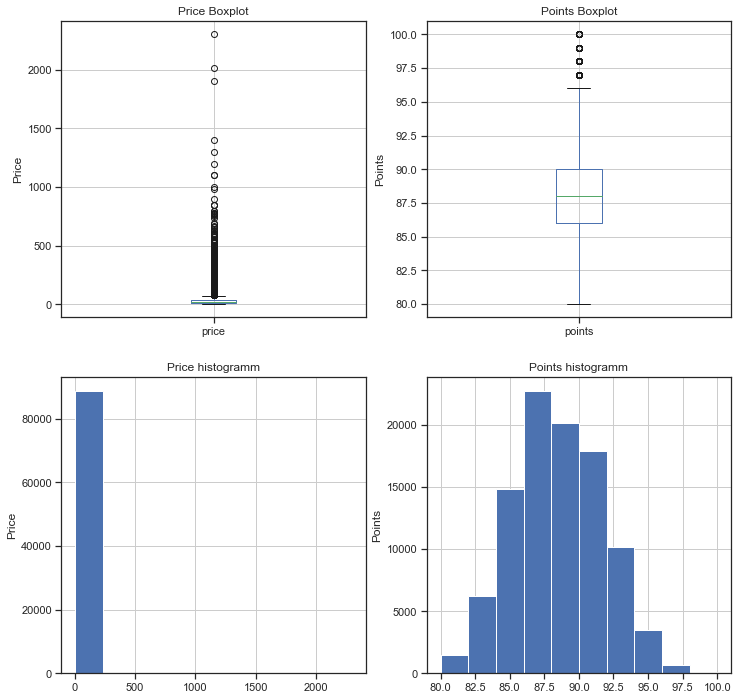

In [167]:
plt.figure(1, figsize=(12,12))

plt.subplot(221)
df.boxplot(column='price');
plt.ylabel('Price')
plt.title('Price Boxplot')
plt.subplot(222)
df.boxplot(column='points');
plt.ylabel('Points')
plt.title('Points Boxplot')
plt.subplot(223)
df.price.hist()
plt.ylabel('Price')
plt.title('Price histogramm')
plt.subplot(224)
df.points.hist()
plt.ylabel('Points')
plt.title('Points histogramm')

plt.show();

In [176]:
df.describe()

,points,price,points_price_ratio,intercept
count,97851.000000,89131.000000,89131.000000,97851.0
mean,87.956730,33.658783,4.065429,1.0
std,3.218138,37.670180,2.380374,0.0
min,80.000000,4.000000,0.043043,1.0
25%,86.000000,16.000000,2.225000,1.0
50%,88.000000,25.000000,3.583333,1.0
75%,90.000000,40.000000,5.466667,1.0
max,100.000000,2300.000000,21.500000,1.0


### Big standard deviation at prices

**Price**
Our first plot section indicates the widely spread out character of the price variables. Most of the prices are equal or lower to 40 USD. Only 25% of the prices in the data set are higher than 25%, with a maximum of 2300. This widely spread out character is also reflected by a high standard devision of 37.67. Even though some outliers can be identified, they seem like valid data points and thus, they were not removed from the data set.

**Points**
The points variable shows a more normally distributed character with ranges between 80 and 100. The standard deviation is rather small compared to the price variable (3.21) and 75% of the data set have point equal to or lower to 90, whereas 50% of the dataset our equal or lower to 75%.

# Bivariate Plots

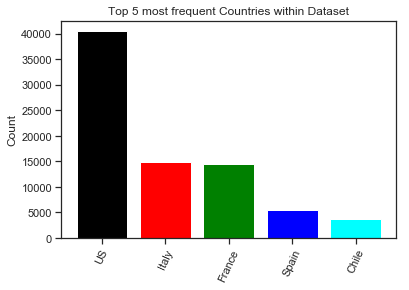

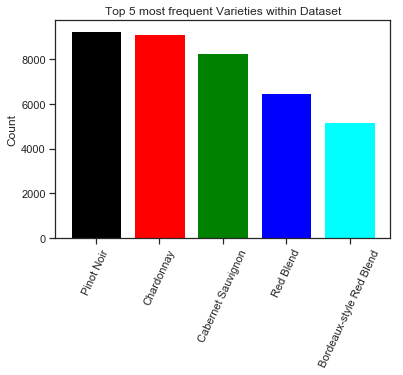

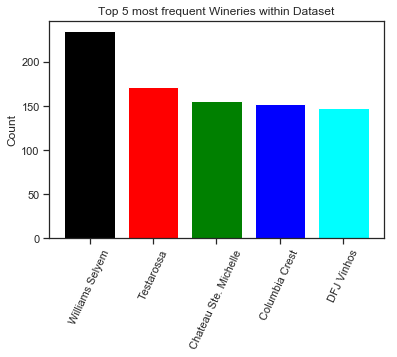

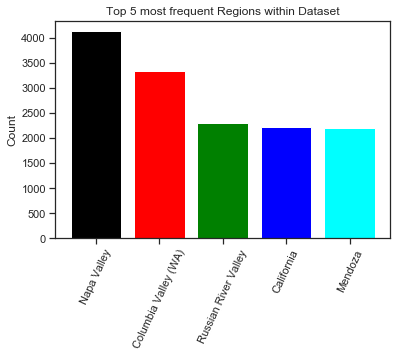

In [186]:
#Analysis of top 5 values among the string columns
fig1, ax1 = plt.subplots()
get_top_5_value_counts_chart(df, 'country');

fig2, ax2 = plt.subplots()
get_top_5_value_counts_chart(df, 'variety');

fig3, ax3 = plt.subplots()
get_top_5_value_counts_chart(df, 'winery');

fig4, ax4 = plt.subplots()
get_top_5_value_counts_chart(df, 'region_1');

plt.show()

### USA dominant in the Data set

The anlysis show that the most frequent wine samples by far, with more than 40'000 counts, are from the United States. Italy and France follow this values with almost 15'000 samples each. Spain and Chile are also among the top 5 represented countries in the data set. 

The 2nd bar chart indicates the most popular varieties in the data set are Pinot Noir, Chardonnay, Cabarnet Sauvignon, Red Blend and Bordeaux-style Red Blend, while Pinot Noir, Chardonnay and Cabarnet Sauvignon share almost the same popularity. Pinot Nir, Chardonnay and Cabarnet Sauvignon are all mainly produced in the US, while Bordeaux-style Red Blend and Red Blend are mainly produced in Europe. 

The most frequent appearing wineries are Williams-Selyem, Testarossa, Chateau Ste. Michelle, Columbia Crest and DFJ Vinhos. Interestingly Williams-Selyem, Testarossa, Chateau Ste. Michelle and Columbia Crest are located in the United Sates, despite having french origin names. Only DFJ Vinhos among the top 5 most frequent wineries is located in Portgual. 

The most frequent appearing regions are Napa Valley, Columbia Valley (WA), Russian River Valley, California,  and Mendoza. The first 4 are all located in the United States, while only Mendoza is located outstide the U.S., namely in Argentina. Napa Valley provides more than 4100 wines, while Columbia Valley (WA) a bit more than 3300 wines. All other regions provide less than 2500 wines. 


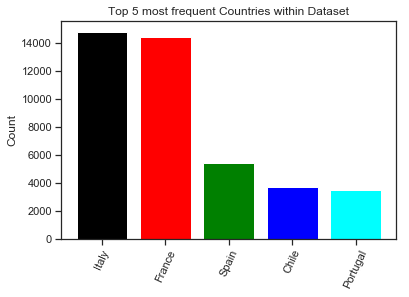

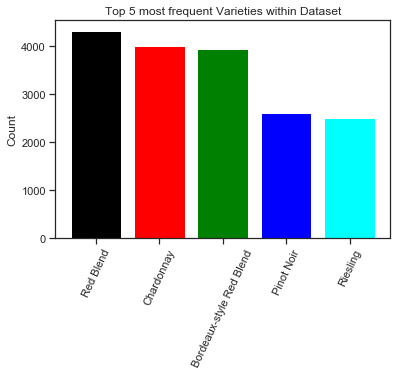

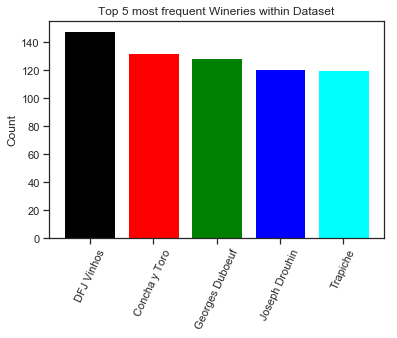

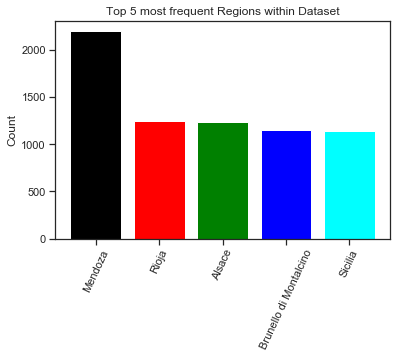

In [191]:
#Analysis of top 5 values among the string columns
fig1, ax1 = plt.subplots()
get_top_5_value_counts_chart(df_not_us, 'country');

fig2, ax2 = plt.subplots()
get_top_5_value_counts_chart(df_not_us, 'variety');

fig3, ax3 = plt.subplots()
get_top_5_value_counts_chart(df_not_us, 'winery');

fig4, ax4 = plt.subplots()
get_top_5_value_counts_chart(df_not_us, 'region_1');

plt.show()

### The view outside the US

By excluding the US from the anlysis, the data show that the most frequent wine sample are from the same 4 as priviously, except Portugal was added to the list of top 5 countries outside the US. Portugal provides 3508 different wines. The dataset shwos that outside the United States, Europe is a major hub for producing wine. 

The 2nd bar chart indicates the most popular varieties in the data set are Red Blend, Chardonnay, Bordeaux-style Red Blend, Pinot Noir and Riesling. The chart indicates that different varietes are among the most popular ones by excluding the United States. While Red Blen, Chardonnay, Bordeaux-style and Pinot Noir remained in the list, Cabarnet Sauvignon dropped out of the list. Even more surprising, Chardonnay was not the most popular variety among the remaining ones, and also otherwise the order of popularity changed. New to the list Riesling was added with more than 2496 samples.

The most frequent appearing wineries outside the U.S. are DFJ Vinhos (Portugal), Concha y Toro (Chile), Georges Duboeuf (France), Joseph Drouhin (France) and Trapiche (Argentina). All of the wineries contributed 120-140 different wines to the data set. 

Interestingly the regions don't follow the same trend as the top wineries. The top region in the dataset, outside the United States, was Mendoza (Argentina), followed by Rioja (Spain), Alsace (France), Brunello di Montalcino (Italy) and Sicilia (Italy). Thereby, Mendoza was by far the most popular region with more than 2199 samples from the region, followed by Roja with 1252 samples. 

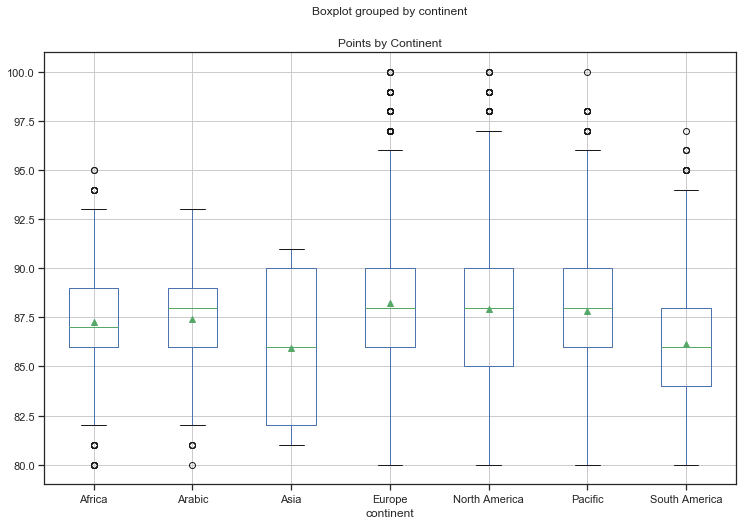

In [208]:
df_if.boxplot('points', by='continent', figsize=(12, 8), showmeans=True)
plt.title('Points by Continent');
#plt.savefig('wine_quality.png', bbox_inches='tight')
plt.show();

### Different median and average wine quality among continents

Our plot indicates the diffferent quality ranges, means and medians can be found among the continents. The chart indicates that European wine has the highest average wine quality, followed by the US and Pacific. Surprisingly, the chart indicates that both African and Arabic wine perform better in average and median than South American wine. Unsurprisingly, Asian wines seems to be the continent with the lowest quality. Europe, North America and Pacific cover the full range of points (min. 80, max. 100). The whole data set shows an average of 87.24 Points with a standard deviation of 0.883. 